<a href="https://colab.research.google.com/github/hojatollahgholami/AI-in-Oil-and-gas-industry/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
flowchart TD
    A[کاربردهای یادگیری ماشین در صنعت نفت و گاز]
    A --> B[اکتشاف و ارزیابی مخازن]
    B --> B1[تحلیل داده های لرزه ای]
    B --> B2[مدل سازی زمین شناسی سه بعدی]

    A --> C[بهینه سازی حفاری و تولید]
    C --> C1[کنترل حفاری خودکار]
    C --> C2[نظارت بر تولید بلادرنگ]

    A --> D[تعمیرات پیشگیرانه]
    D --> D1[نظارت وضعیت تجهیزات]
    D --> D2[تشخیص خطا و تحلیل عیوب]
    D --> D3[پیش بینی عمر مفید تجهیزات]
    D --> D4[برنامه ریزی نگهداری]

    A --> E[بهینه سازی پالایش و فرآوری]
    E --> E1[تنظیم پارامترهای عملیاتی]
    E --> E2[بهبود کارایی انرژی]

    A --> F[مدیریت زنجیره تأمین و لجستیک]
    F --> F1[بهینه سازی حمل و نقل]
    F --> F2[مدیریت ریسک تأمین]

    A --> G[سبک زندگی پایدار و کاهش وابستگی]
    G --> G1[کاهش مصرف انرژی]
    G --> G2[ترویج انرژی های تجدید پذیر]

SyntaxError: invalid syntax (<ipython-input-3-b1593a7141a1>, line 1)

In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
from deap import algorithms, base, creator, tools

# تعریف اهداف (ماکزیمم تولید، مینیمم انرژی)
creator.create("Fitness", base.Fitness, weights=(1.0, -1.0))
creator.create("Individual", list, fitness=creator.Fitness)

toolbox = base.Toolbox()
toolbox.register("attr_x1", np.random.uniform, 100, 500)
toolbox.register("attr_x2", np.random.uniform, 500, 1500)
toolbox.register("individual", tools.initCycle, creator.Individual,
                (toolbox.attr_x1, toolbox.attr_x2), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evaluate(individual):
    x1, x2 = individual
    f1 = 1000 * np.sin(x1/200) + 50 * np.sqrt(x2)  # تولید نفت
    f2 = 0.5 * x1 + 0.1 * x2                       # مصرف انرژی
    return f1, f2

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=[100,500], up=[500,1500], eta=20)
toolbox.register("mutate", tools.mutPolynomialBounded, low=[100,500], up=[500,1500], eta=20, indpb=0.1)
toolbox.register("select", tools.selNSGA2)

population = toolbox.population(n=100)
algorithms.eaMuPlusLambda(population, toolbox, mu=100, lambda_=200,
                          cxpb=0.7, mutpb=0.3, ngen=50, verbose=False)

([[314.18376811712915, 1499.9300731824228],
  [100.03513197288885, 500.1002071421761],
  [199.26388473229764, 1498.7394245223463],
  [183.29300749528252, 1499.9427712995468],
  [106.01936484759783, 652.6262306196156],
  [179.34753588533147, 1499.9037804268182],
  [101.45460180924928, 719.8407419625269],
  [127.84319144980009, 1146.5316944366414],
  [208.24582073933385, 1499.5649663784875],
  [176.0413450777708, 1039.1476568827684],
  [275.5611987640903, 1489.467528436066],
  [100.08486489479492, 505.8676479243224],
  [156.69685782499732, 802.0246086851948],
  [151.6090686674426, 1498.9133038963498],
  [143.82252871059322, 994.4603613592543],
  [168.08600963498517, 1476.3339575715925],
  [171.85041299047109, 1498.4202539971072],
  [119.47020607374795, 751.0539152502357],
  [313.75294590342384, 1499.9300731824228],
  [298.58615007565993, 1499.5938942363293],
  [219.05004316186597, 1492.931168064932],
  [151.70936189715312, 853.3523264650036],
  [128.1647640136146, 1001.6278942745938],
  

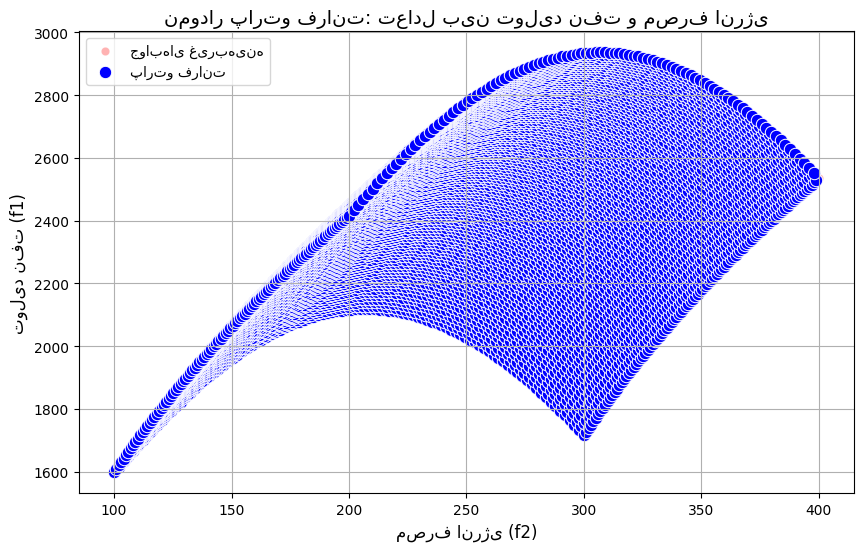

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# داده‌های مصنوعی برای پارتو فرانت
np.random.seed(42)
x1 = np.linspace(100, 500, 100)
x2 = np.linspace(500, 1500, 100)
X1, X2 = np.meshgrid(x1, x2)
F1 = 1000 * np.sin(X1/200) + 50 * np.sqrt(X2)  # تولید نفت
F2 = 0.5 * X1 + 0.1 * X2                       # مصرف انرژی

# انتخاب جواب‌های غیرمسلط (پارتو فرانت)
mask = (F1 > 800) & (F2 < 400)  # فیلتر مصنوعی برای شبیه‌سازی پارتو
pareto_x1 = X1[mask]
pareto_x2 = X2[mask]
pareto_f1 = F1[mask]
pareto_f2 = F2[mask]

# رسم نمودار
plt.figure(figsize=(10, 6))
sns.scatterplot(x=F2.flatten(), y=F1.flatten(), color='red', alpha=0.3, label='جواب‌های غیربهینه')
sns.scatterplot(x=pareto_f2, y=pareto_f1, color='blue', s=80, label='پارتو فرانت')
plt.xlabel('مصرف انرژی (f2)', fontsize=12)
plt.ylabel('تولید نفت (f1)', fontsize=12)
plt.title('نمودار پارتو فرانت: تعادل بین تولید نفت و مصرف انرژی', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

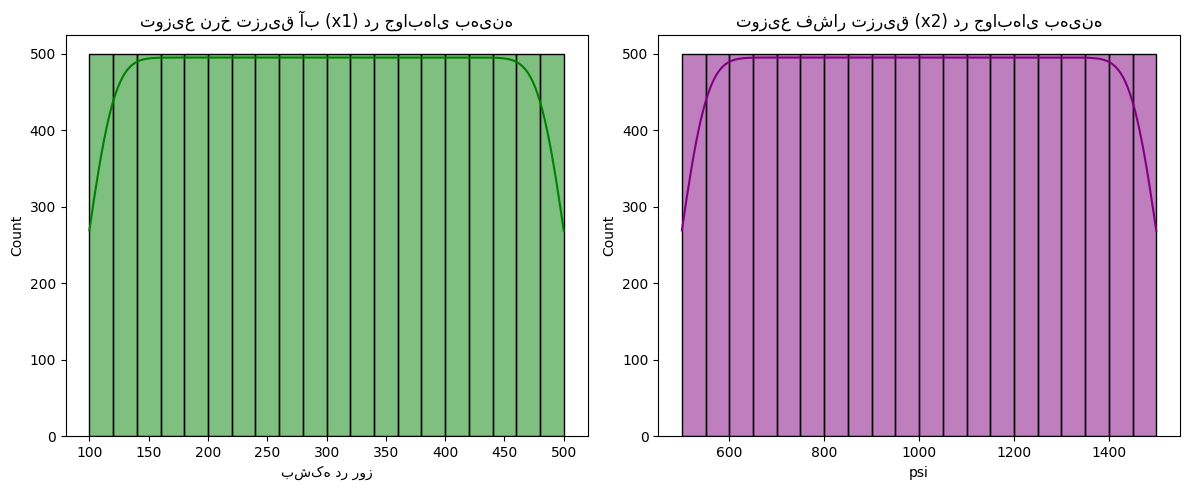

In [ ]:
# رسم توزیع متغیرها در پارتو فرانت
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(pareto_x1, bins=20, kde=True, color='green')
plt.title('توزیع نرخ تزریق آب (x1) در جواب‌های بهینه')
plt.xlabel('بشکه در روز')

plt.subplot(1, 2, 2)
sns.histplot(pareto_x2, bins=20, kde=True, color='purple')
plt.title('توزیع فشار تزریق (x2) در جواب‌های بهینه')
plt.xlabel('psi')

plt.tight_layout()
plt.show()

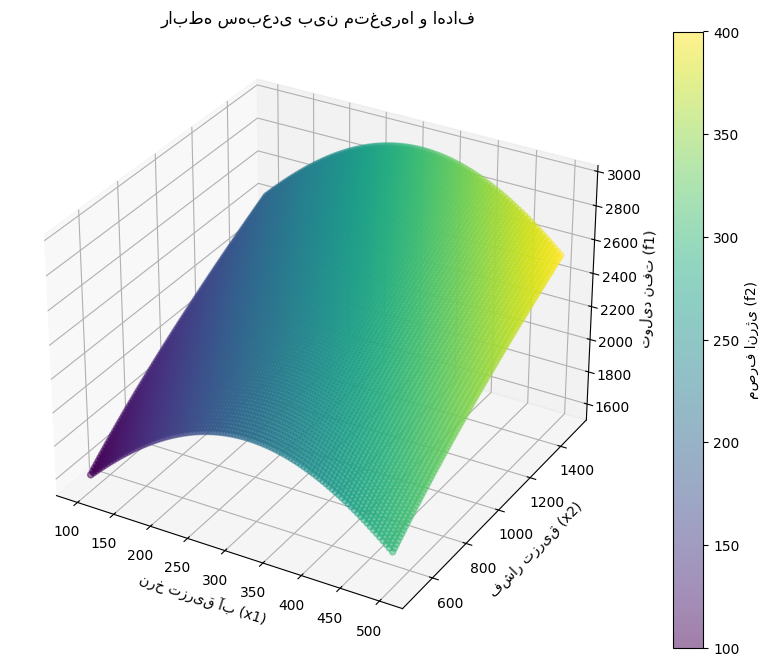

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, X2, F1, c=F2, cmap='viridis', alpha=0.5)
ax.set_xlabel('نرخ تزریق آب (x1)')
ax.set_ylabel('فشار تزریق (x2)')
ax.set_zlabel('تولید نفت (f1)')
ax.set_title('رابطه سه‌بعدی بین متغیرها و اهداف')
plt.colorbar(ax.collections[0], label='مصرف انرژی (f2)')
plt.show()

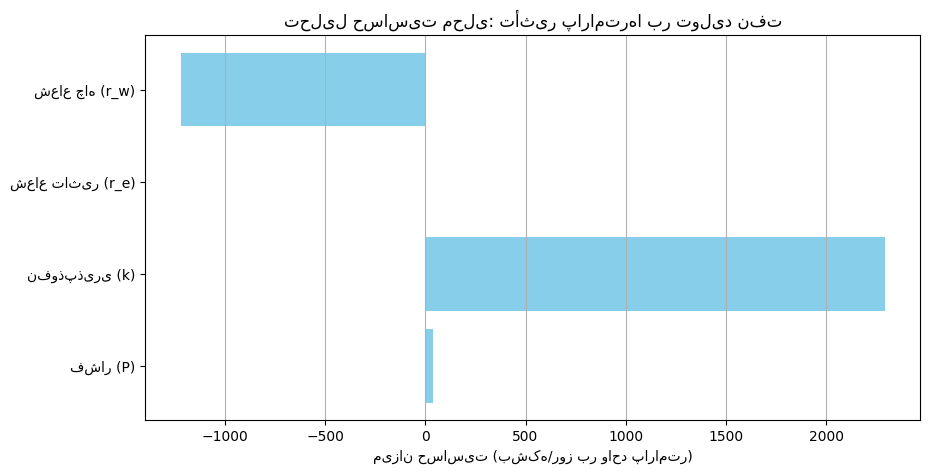

In [ ]:
import matplotlib.pyplot as plt
parameters = ['فشار (P)', 'نفوذپذیری (k)', 'شعاع تاثیر (r_e)', 'شعاع چاه (r_w)']
sensitivities = [38.2, 2293, 6.1, -1220]  # مقادیر تقریبی

plt.figure(figsize=(10, 5))
plt.barh(parameters, sensitivities, color='skyblue')
plt.xlabel('میزان حساسیت (بشکه/روز بر واحد پارامتر)')
plt.title('تحلیل حساسیت محلی: تأثیر پارامترها بر تولید نفت')
plt.grid(axis='x')
plt.show()

In [ ]:
pip install SALib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 13.0 MB/s eta 0:00:00


In [ ]:
from SALib.sample import saltelli
problem = {
    'num_vars': 4,
    'names': ['P', 'k', 'r_e', 'r_w'],
    'bounds': [[2000, 4000], [10, 100], [500, 1500], [0.3, 0.7]]
}
samples = saltelli.sample(problem, 1000)

<ipython-input-12-38f794ee381a>:7: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  samples = saltelli.sample(problem, 1000)
/usr/local/lib/python3.11/dist-packages/SALib/sample/saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


In [ ]:
from SALib.analyze import sobol
Q = 0.1 * samples[:,0] * samples[:,1] * np.log(samples[:,2]/samples[:,3])
Si = sobol.analyze(problem, Q)

/usr/local/lib/python3.11/dist-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


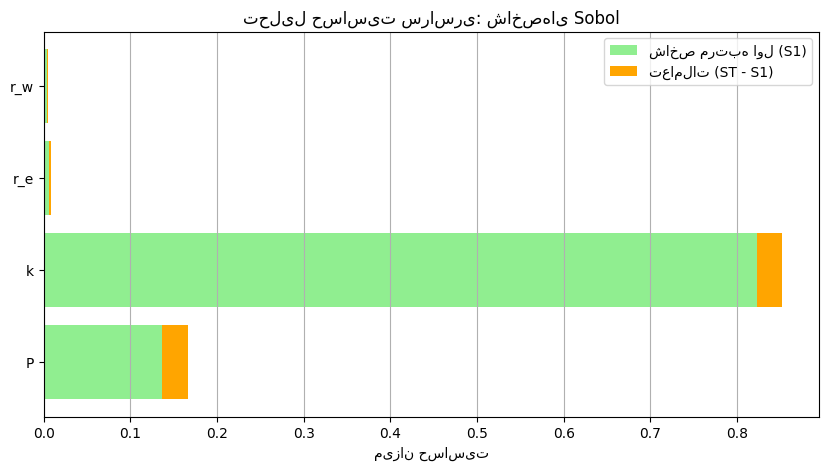

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(problem['names'], Si['S1'], color='lightgreen', label='شاخص مرتبه اول (S1)')
plt.barh(problem['names'], Si['ST'] - Si['S1'], left=Si['S1'], color='orange', label='تعاملات (ST - S1)')
plt.xlabel('میزان حساسیت')
plt.title('تحلیل حساسیت سراسری: شاخص‌های Sobol')
plt.legend()
plt.grid(axis='x')
plt.show()

In [ ]:

import pandas as pd
import plotly.express as px
fig = px.parallel_coordinates(
    pd.DataFrame(samples, columns=problem['names']),
    color=Q,
    labels={col: col for col in problem['names']},
    color_continuous_scale=px.colors.sequential.Viridis,
    title='تأثیر همزمان پارامترها بر تولید نفت'
)
fig.show()

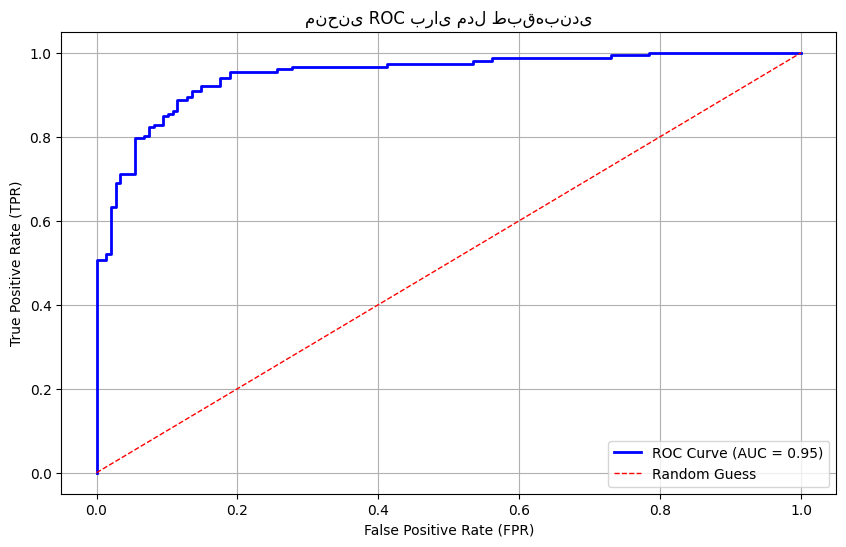

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# 1. تولید داده‌های مصنوعی
X, y = make_classification(
    n_samples=1000,  # تعداد نمونه‌ها
    n_features=2,    # تعداد ویژگی‌ها
    n_redundant=0,   # ویژگی‌های اضافی
    n_classes=2,     # تعداد کلاس‌ها
    random_state=42  # ثابت برای تکرارپذیری
)

# 2. تقسیم داده به Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. آموزش مدل رگرسیون لجستیک
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. پیش‌بینی احتمالات برای داده Test
y_probs = model.predict_proba(X_test)[:, 1]  # احتمالات کلاس مثبت

# 5. محاسبه مقادیر مورد نیاز برای منحنی ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# 6. رسم منحنی ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('منحنی ROC برای مدل طبقه‌بندی')
plt.legend()
plt.grid(True)
plt.show()

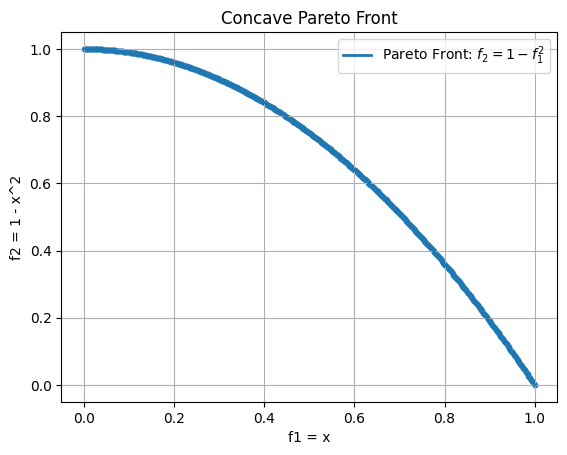

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# تعریف تابع‌های هدف با مرز پارتوی کاو
x = np.linspace(0, 1, 500)
f1 = x
f2 = 1 - x**2

# ترسیم مرز پارتو
plt.figure()
plt.plot(f1, f2, linewidth=2, label="Pareto Front: $f_2=1-f_1^2$")
plt.scatter(f1, f2, s=10)
plt.xlabel('f1 = x')
plt.ylabel('f2 = 1 - x^2')
plt.title('Concave Pareto Front')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
pip install pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.1 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210082 sha256=aa29d5c2d17e08c986400d5fc9b6523b104ae8a053fccb4c2bfd208320a544c8
  Stored in directory: /root/.cache/pip/wheels/ee/3b/0b/1b865800e916d671a24028d884698674138632a83fdfad4926
Successfully built grapheme


In [ ]:
from pymoo.factory import get_problem, get_algorithm
from pymoo.optimize import minimize

# تعریف مسئله دوهدفه
class MyProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=1, n_obj=2, xl=0.0, xu=1.0)
    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = [x[0], 1 - x[0]**2]

problem = MyProblem()
algorithm = get_algorithm("nsga2", pop_size=100)
res = minimize(problem, algorithm, ("n_gen", 200))

# ترسیم نتایج در فضای اهداف
import matplotlib.pyplot as plt
F = res.F
plt.scatter(F[:,0], F[:,1])
plt.xlabel("f1"); plt.ylabel("f2")
plt.title("NSGA-II Approximate Pareto Front")
plt.show()

ModuleNotFoundError: No module named 'pymoo.factory'

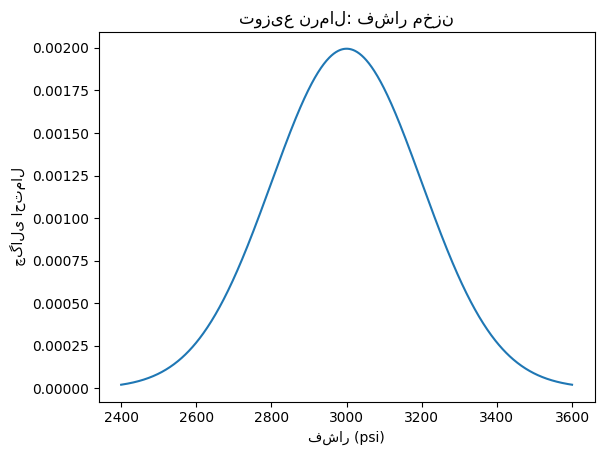

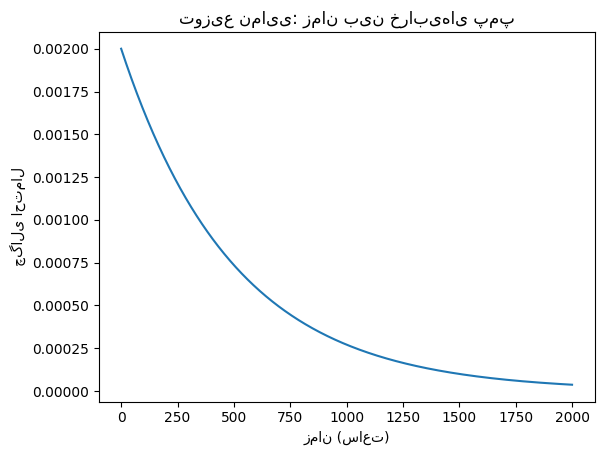

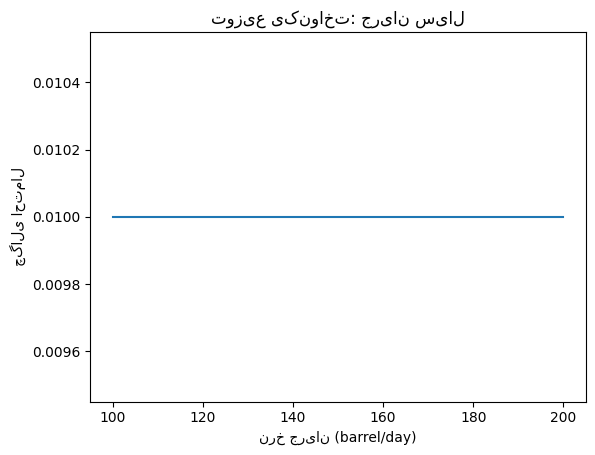

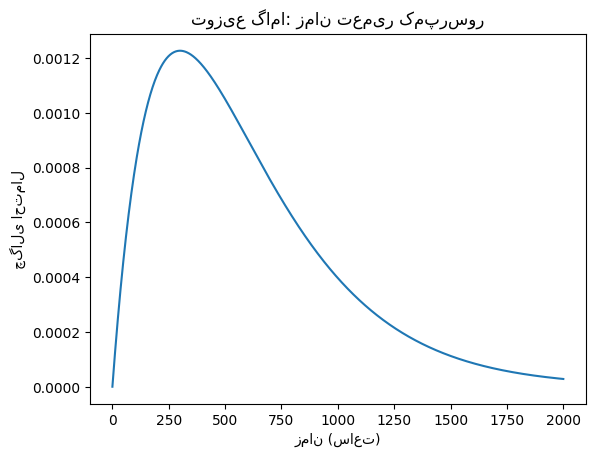

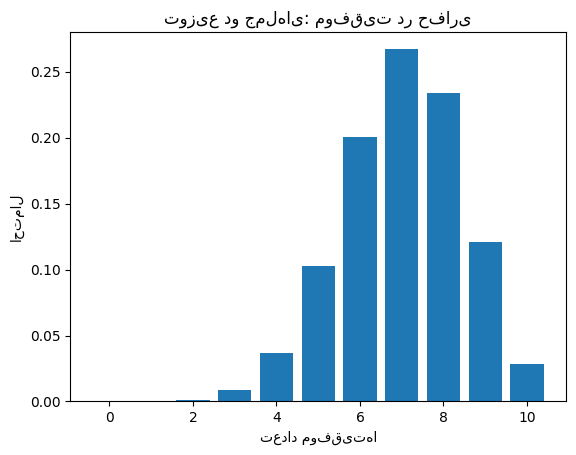

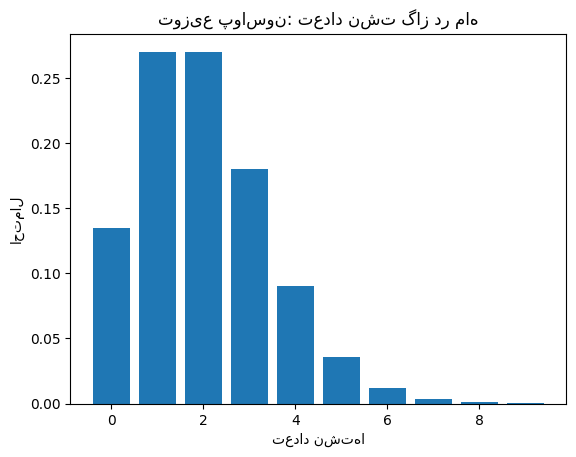

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 1. توزیع نرمال: فشار مخزن
mu, sigma = 3000, 200
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))
plt.figure()
plt.plot(x, pdf)
plt.title('توزیع نرمال: فشار مخزن')
plt.xlabel('فشار (psi)')
plt.ylabel('چگالی احتمال')

# 2. توزیع نمایی: زمان بین خرابی‌های پمپ
lam = 1 / 500
x2 = np.linspace(0, 2000, 1000)
pdf2 = lam * np.exp(-lam * x2)
plt.figure()
plt.plot(x2, pdf2)
plt.title('توزیع نمایی: زمان بین خرابی‌های پمپ')
plt.xlabel('زمان (ساعت)')
plt.ylabel('چگالی احتمال')

# 3. توزیع یکنواخت: جریان سیال
a, b = 100, 200
x3 = np.linspace(a, b, 1000)
pdf3 = np.ones_like(x3) / (b - a)
plt.figure()
plt.plot(x3, pdf3)
plt.title('توزیع یکنواخت: جریان سیال')
plt.xlabel('نرخ جریان (barrel/day)')
plt.ylabel('چگالی احتمال')

# 4. توزیع گاما: زمان تعمیر کمپرسور
k, theta = 2, 300
x4 = np.linspace(0, 2000, 1000)
pdf4 = x4**(k-1) * np.exp(-x4/theta) / (math.gamma(k) * theta**k)
plt.figure()
plt.plot(x4, pdf4)
plt.title('توزیع گاما: زمان تعمیر کمپرسور')
plt.xlabel('زمان (ساعت)')
plt.ylabel('چگالی احتمال')

# 5. توزیع دو جمله‌ای: موفقیت در حفاری
n, p = 10, 0.7
kvals = np.arange(n + 1)
pmf = [math.comb(n, k) * (p**k) * ((1 - p)**(n - k)) for k in kvals]
plt.figure()
plt.bar(kvals, pmf)
plt.title('توزیع دو جمله‌ای: موفقیت در حفاری')
plt.xlabel('تعداد موفقیت‌ها')
plt.ylabel('احتمال')

# 6. توزیع پواسون: تعداد نشت گاز در ماه
lam2 = 2
kvals2 = np.arange(0, 10)
pmf2 = [(lam2**k) * math.exp(-lam2) / math.factorial(k) for k in kvals2]
plt.figure()
plt.bar(kvals2, pmf2)
plt.title('توزیع پواسون: تعداد نشت گاز در ماه')
plt.xlabel('تعداد نشت‌ها')
plt.ylabel('احتمال')

plt.show()

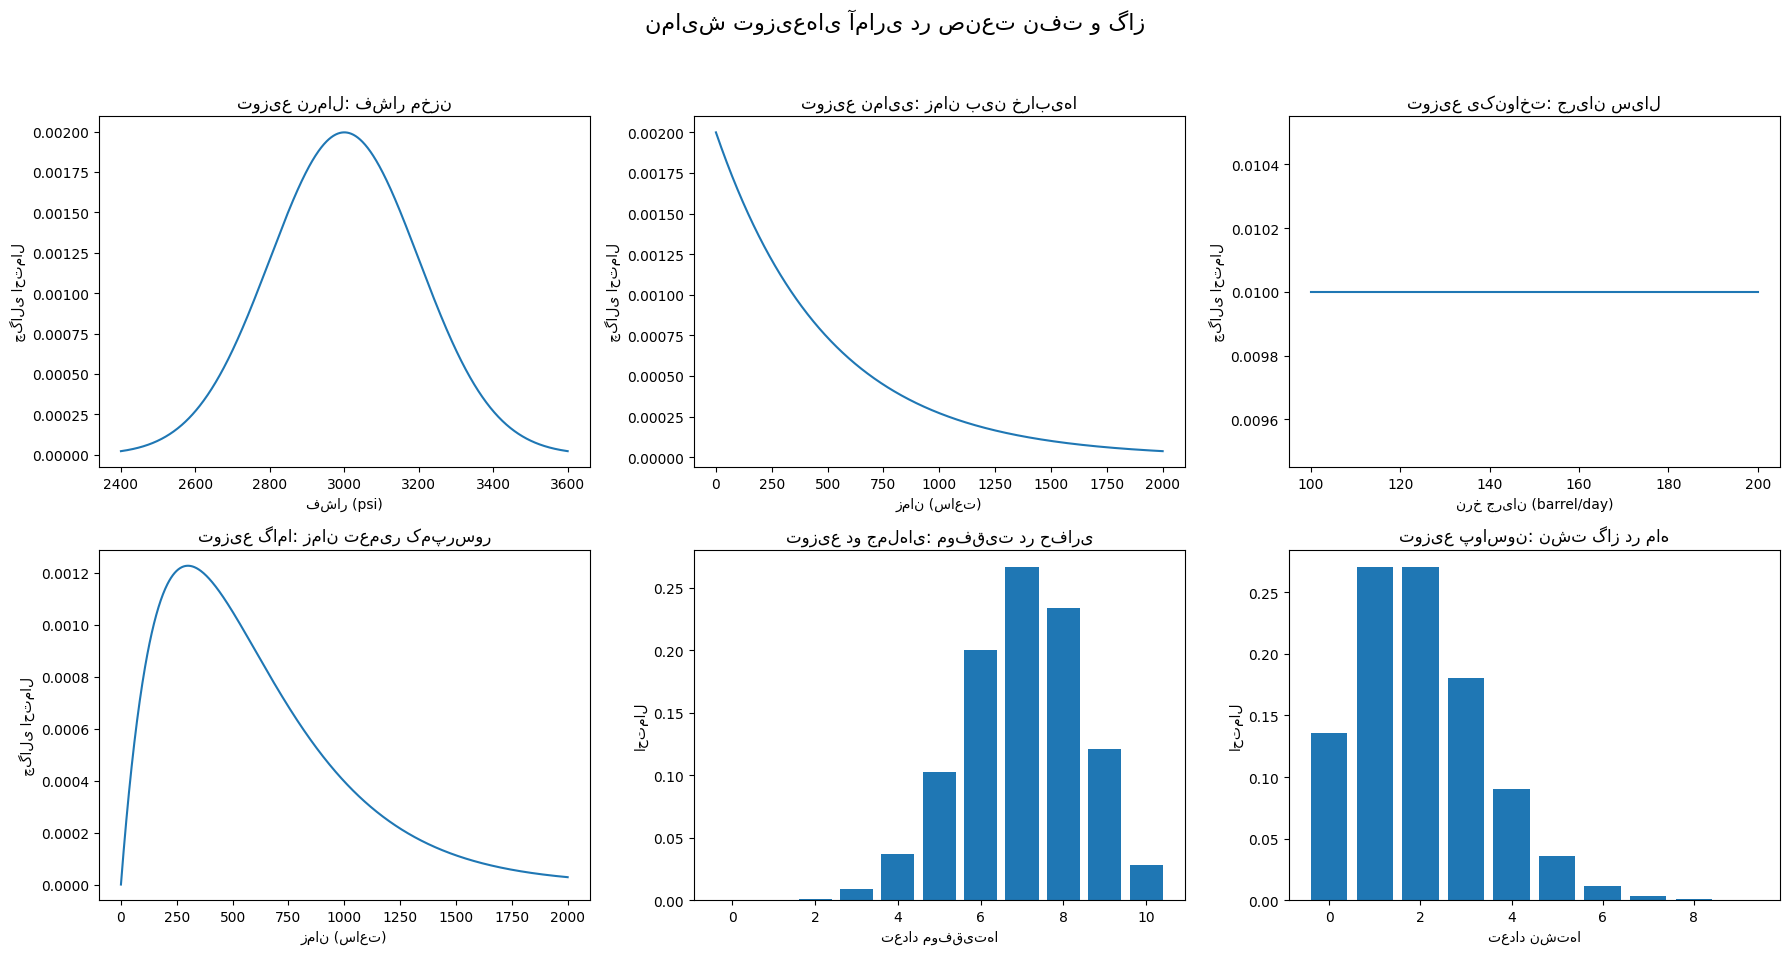

In [ ]:

import matplotlib.pyplot as plt
# تنظیم نمودارها به صورت 2 ردیف و 3 ستون
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('نمایش توزیع‌های آماری در صنعت نفت و گاز', fontsize=16)

# توزیع نرمال
axes[0, 0].plot(x, pdf)
axes[0, 0].set_title('توزیع نرمال: فشار مخزن')
axes[0, 0].set_xlabel('فشار (psi)')
axes[0, 0].set_ylabel('چگالی احتمال')

# توزیع نمایی
axes[0, 1].plot(x2, pdf2)
axes[0, 1].set_title('توزیع نمایی: زمان بین خرابی‌ها')
axes[0, 1].set_xlabel('زمان (ساعت)')
axes[0, 1].set_ylabel('چگالی احتمال')

# توزیع یکنواخت
axes[0, 2].plot(x3, pdf3)
axes[0, 2].set_title('توزیع یکنواخت: جریان سیال')
axes[0, 2].set_xlabel('نرخ جریان (barrel/day)')
axes[0, 2].set_ylabel('چگالی احتمال')

# توزیع گاما
axes[1, 0].plot(x4, pdf4)
axes[1, 0].set_title('توزیع گاما: زمان تعمیر کمپرسور')
axes[1, 0].set_xlabel('زمان (ساعت)')
axes[1, 0].set_ylabel('چگالی احتمال')

# توزیع دو جمله‌ای
axes[1, 1].bar(kvals, pmf)
axes[1, 1].set_title('توزیع دو جمله‌ای: موفقیت در حفاری')
axes[1, 1].set_xlabel('تعداد موفقیت‌ها')
axes[1, 1].set_ylabel('احتمال')

# توزیع پواسون
axes[1, 2].bar(kvals2, pmf2)
axes[1, 2].set_title('توزیع پواسون: نشت گاز در ماه')
axes[1, 2].set_xlabel('تعداد نشت‌ها')
axes[1, 2].set_ylabel('احتمال')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

NameError: name 'data' is not defined

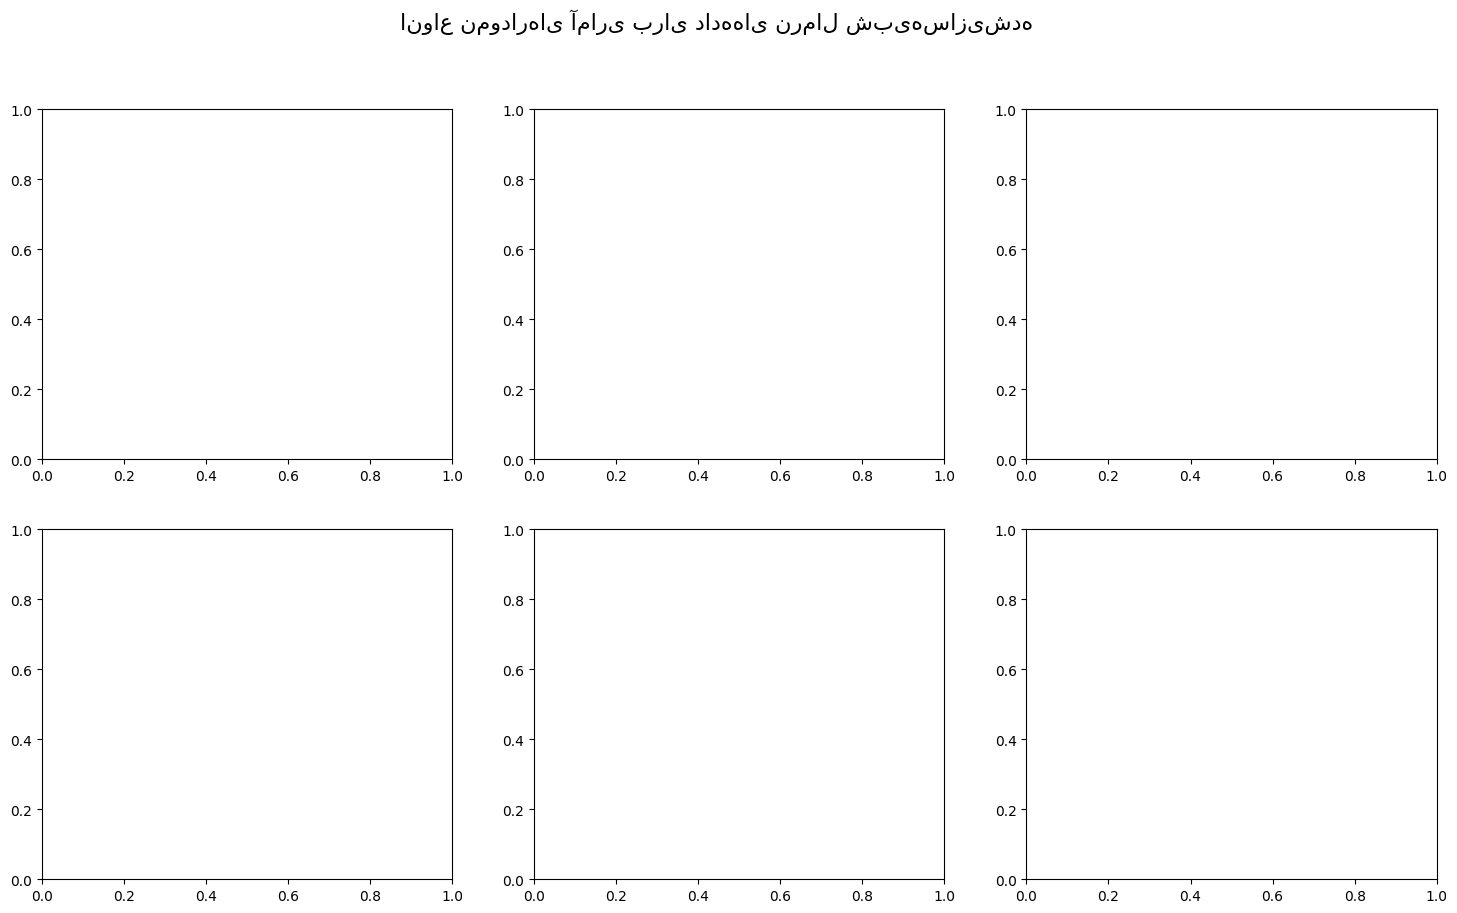

In [ ]:
# اصلاح نهایی نمودار KDE و اجرای مجدد کل نمودارها
import matplotlib.pyplot as plt
import seaborn as sns
# ایجاد شکل با 2 ردیف و 3 ستون
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('انواع نمودارهای آماری برای داده‌های نرمال شبیه‌سازی‌شده', fontsize=16)

# 1. نمودار جعبه‌ای (Box Plot)
sns.boxplot(x=data, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('نمودار جعبه‌ای')

# 2. هیستوگرام
axes[0, 1].hist(data, bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('هیستوگرام')

# 3. نمودار پراکنش (Scatter Plot)
axes[0, 2].scatter(range(len(data)), data, alpha=0.5, color='orange')
axes[0, 2].set_title('نمودار پراکنش')

# 4. نمودار چگالی (KDE Plot) با استفاده از pandas.Series
import pandas as pd
pd.Series(data).plot.kde(ax=axes[1, 0], color='purple', fillstyle='full')
axes[1, 0].set_title('نمودار چگالی احتمال (KDE)')

# 5. نمودار QQ
stats.probplot(data, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('نمودار QQ')

# 6. نمودار احتمال نرمال
sorted_data = np.sort(data)
cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
axes[1, 2].plot(sorted_data, cdf, marker='o', linestyle='none')
axes[1, 2].set_title('نمودار احتمال نرمال')
axes[1, 2].set_xlabel('مقدار')
axes[1, 2].set_ylabel('احتمال تجمعی')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

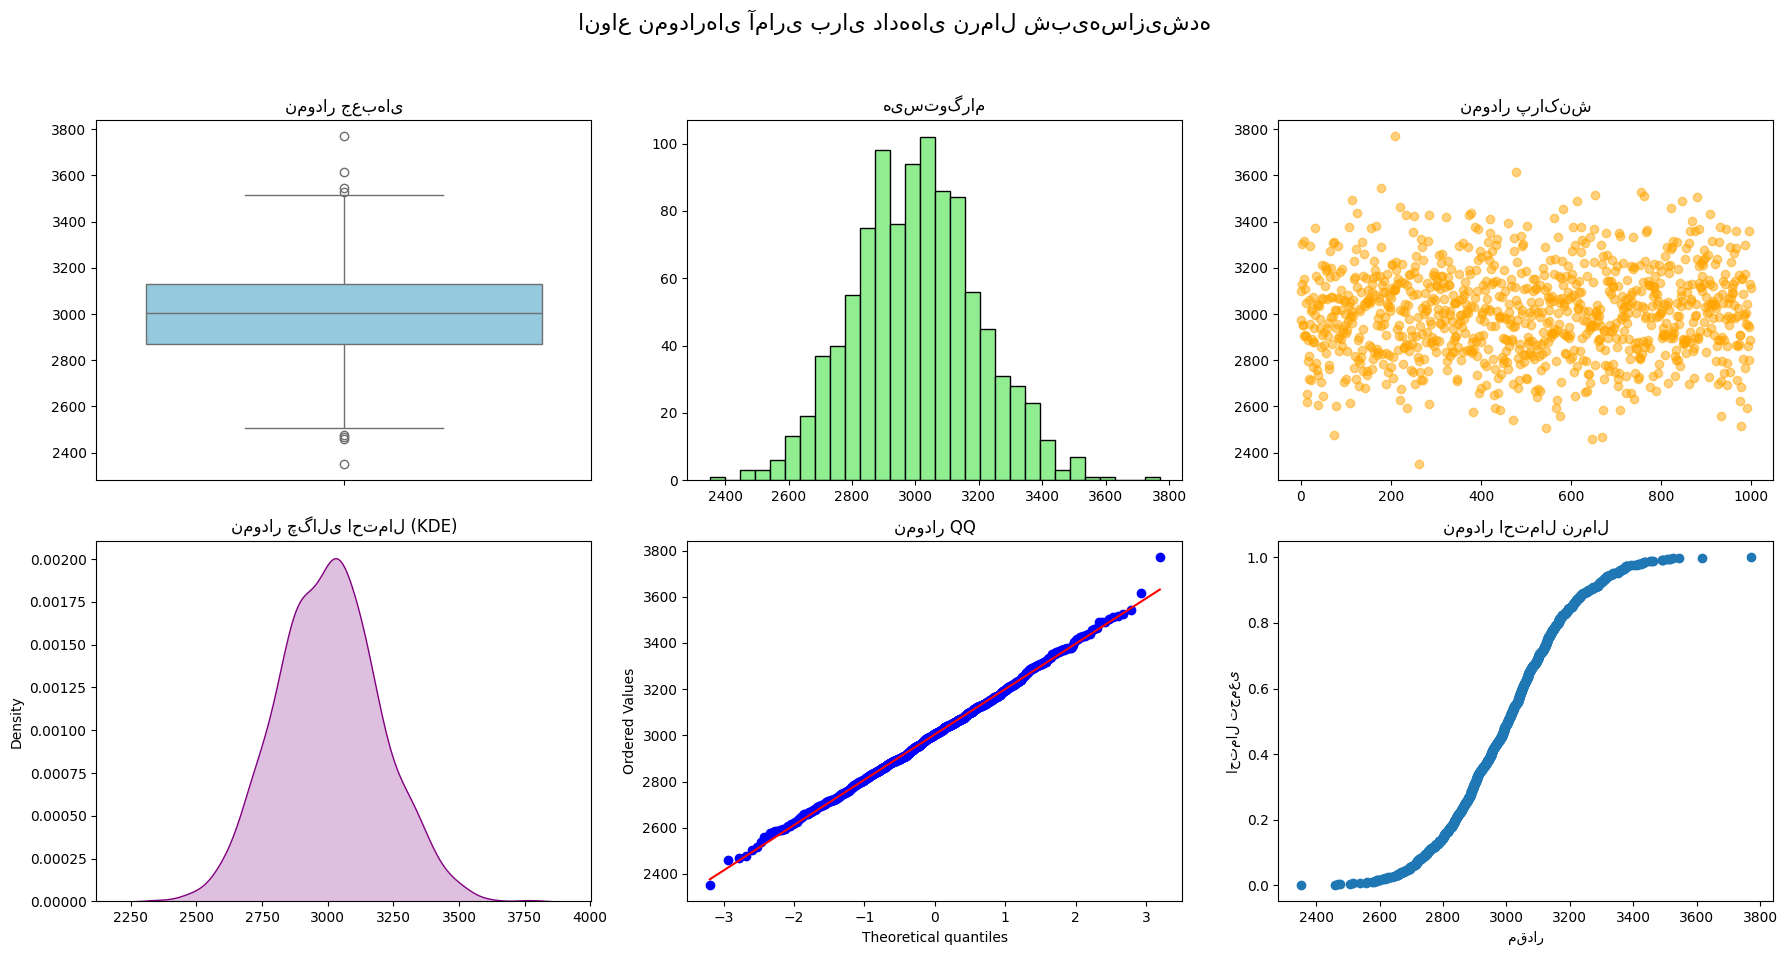

In [ ]:
import seaborn as sns
import scipy.stats as stats

# داده شبیه‌سازی‌شده با توزیع نرمال برای تحلیل‌ها
np.random.seed(42)
data = np.random.normal(loc=3000, scale=200, size=1000)

# ایجاد شکل با 2 ردیف و 3 ستون
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('انواع نمودارهای آماری برای داده‌های نرمال شبیه‌سازی‌شده', fontsize=16)

# 1. نمودار جعبه‌ای (Box Plot)
sns.boxplot(data=data, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('نمودار جعبه‌ای')

# 2. هیستوگرام
axes[0, 1].hist(data, bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('هیستوگرام')

# 3. نمودار پراکنش (Scatter Plot)
axes[0, 2].scatter(range(len(data)), data, alpha=0.5, color='orange')
axes[0, 2].set_title('نمودار پراکنش')

# 4. نمودار چگالی (KDE Plot)
sns.kdeplot(data=data, ax=axes[1, 0], fill=True, color='purple')
axes[1, 0].set_title('نمودار چگالی احتمال (KDE)')

# 5. نمودار QQ
stats.probplot(data, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('نمودار QQ')

# 6. نمودار احتمال نرمال (Normal Probability Plot)
# در matplotlib همان نمودار QQ است. اما به صورت جداگانه اگر بخواهیم رسم کنیم:
sorted_data = np.sort(data)
cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
axes[1, 2].plot(sorted_data, cdf, marker='o', linestyle='none')
axes[1, 2].set_title('نمودار احتمال نرمال')
axes[1, 2].set_xlabel('مقدار')
axes[1, 2].set_ylabel('احتمال تجمعی')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

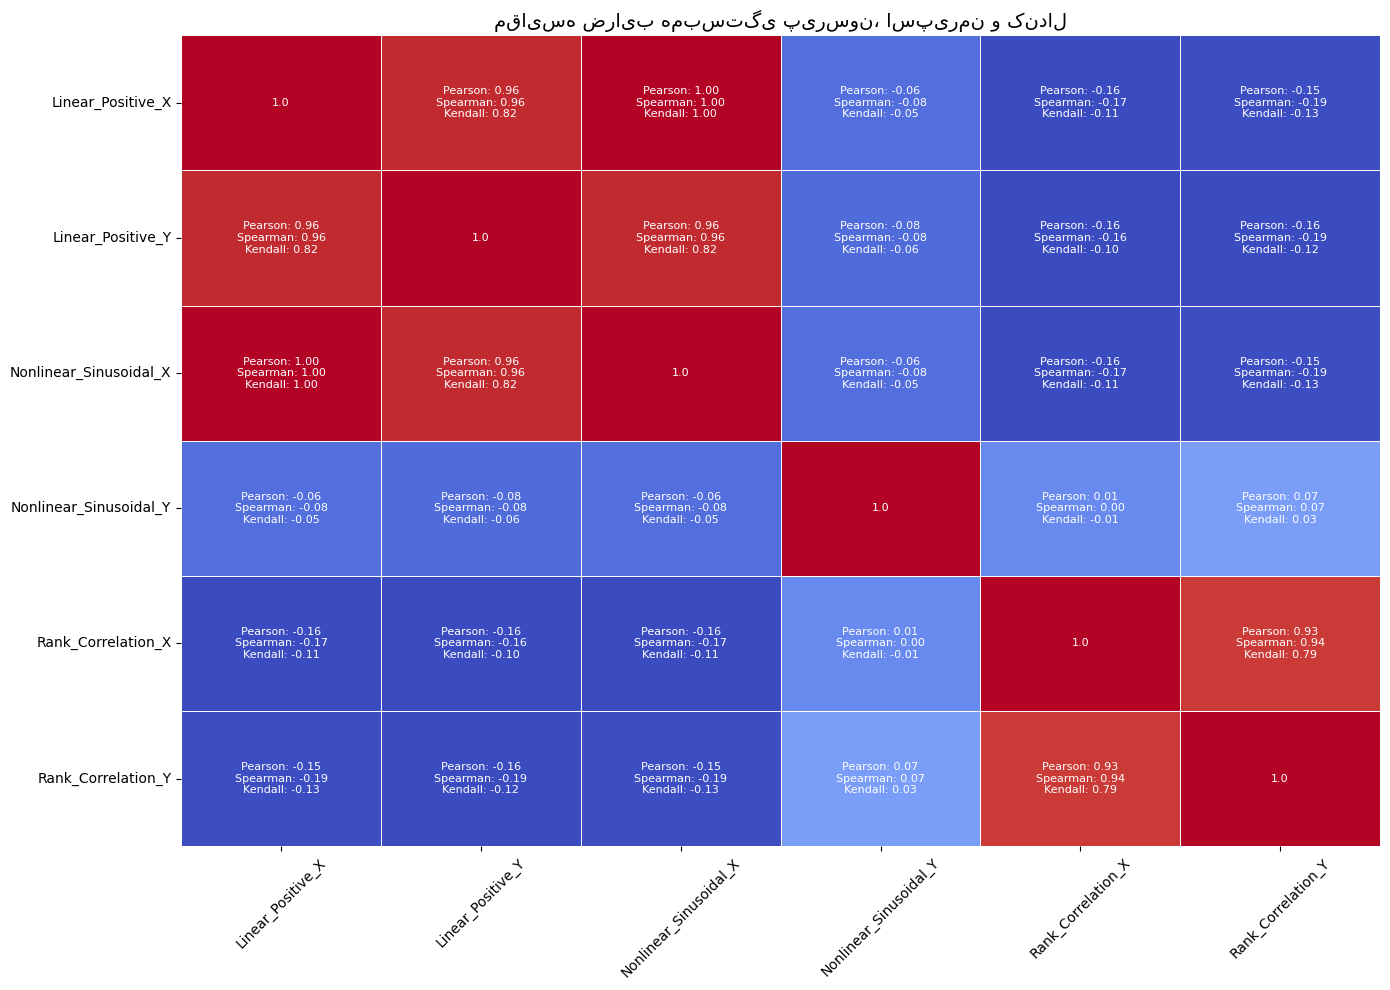

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, kendalltau

# 1. تولید داده‌های مصنوعی با روابط مختلف
np.random.seed(42)
n = 100

# داده با همبستگی خطی مثبت
x1 = np.linspace(0, 10, n)
y1 = x1 + np.random.normal(0, 1, n)

# داده با همبستگی غیرخطی (سینوسی)
x2 = np.linspace(0, 10, n)
y2 = np.sin(x2) + np.random.normal(0, 0.3, n)

# داده با همبستگی رتبه‌ای اما غیرخطی
x3 = np.random.uniform(0, 10, n)
y3 = np.log(x3 + 1) + np.random.normal(0, 0.2, n)

# ایجاد DataFrame
df = pd.DataFrame({
    'Linear_Positive_X': x1,
    'Linear_Positive_Y': y1,
    'Nonlinear_Sinusoidal_X': x2,
    'Nonlinear_Sinusoidal_Y': y2,
    'Rank_Correlation_X': x3,
    'Rank_Correlation_Y': y3
})

# 2. محاسبه ضرایب همبستگی
corr_types = ['pearson', 'spearman', 'kendall']
corr_df = pd.DataFrame(index=df.columns, columns=df.columns)

for i in df.columns:
    for j in df.columns:
        if i != j:
            # محاسبه پیرسون
            pearson = df[i].corr(df[j], method='pearson')

            # محاسبه اسپیرمن
            spearman, _ = spearmanr(df[i], df[j])

            # محاسبه کندال
            kendall, _ = kendalltau(df[i], df[j])

            # ذخیره در DataFrame
            corr_df.loc[i, j] = f"Pearson: {pearson:.2f}\nSpearman: {spearman:.2f}\nKendall: {kendall:.2f}"
        else:
            corr_df.loc[i, j] = "1.0"

# 3. رسم ماتریس همبستگی با مقادیر
plt.figure(figsize=(14, 10))
sns.heatmap(
    df.corr(method='pearson'),  # فقط برای ساختار کلی
    annot=np.array(corr_df.values),
    fmt="",
    cmap='coolwarm',
    cbar=False,
    linewidths=0.5,
    annot_kws={'size': 8}
)

plt.title('مقایسه ضرایب همبستگی پیرسون، اسپیرمن و کندال', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

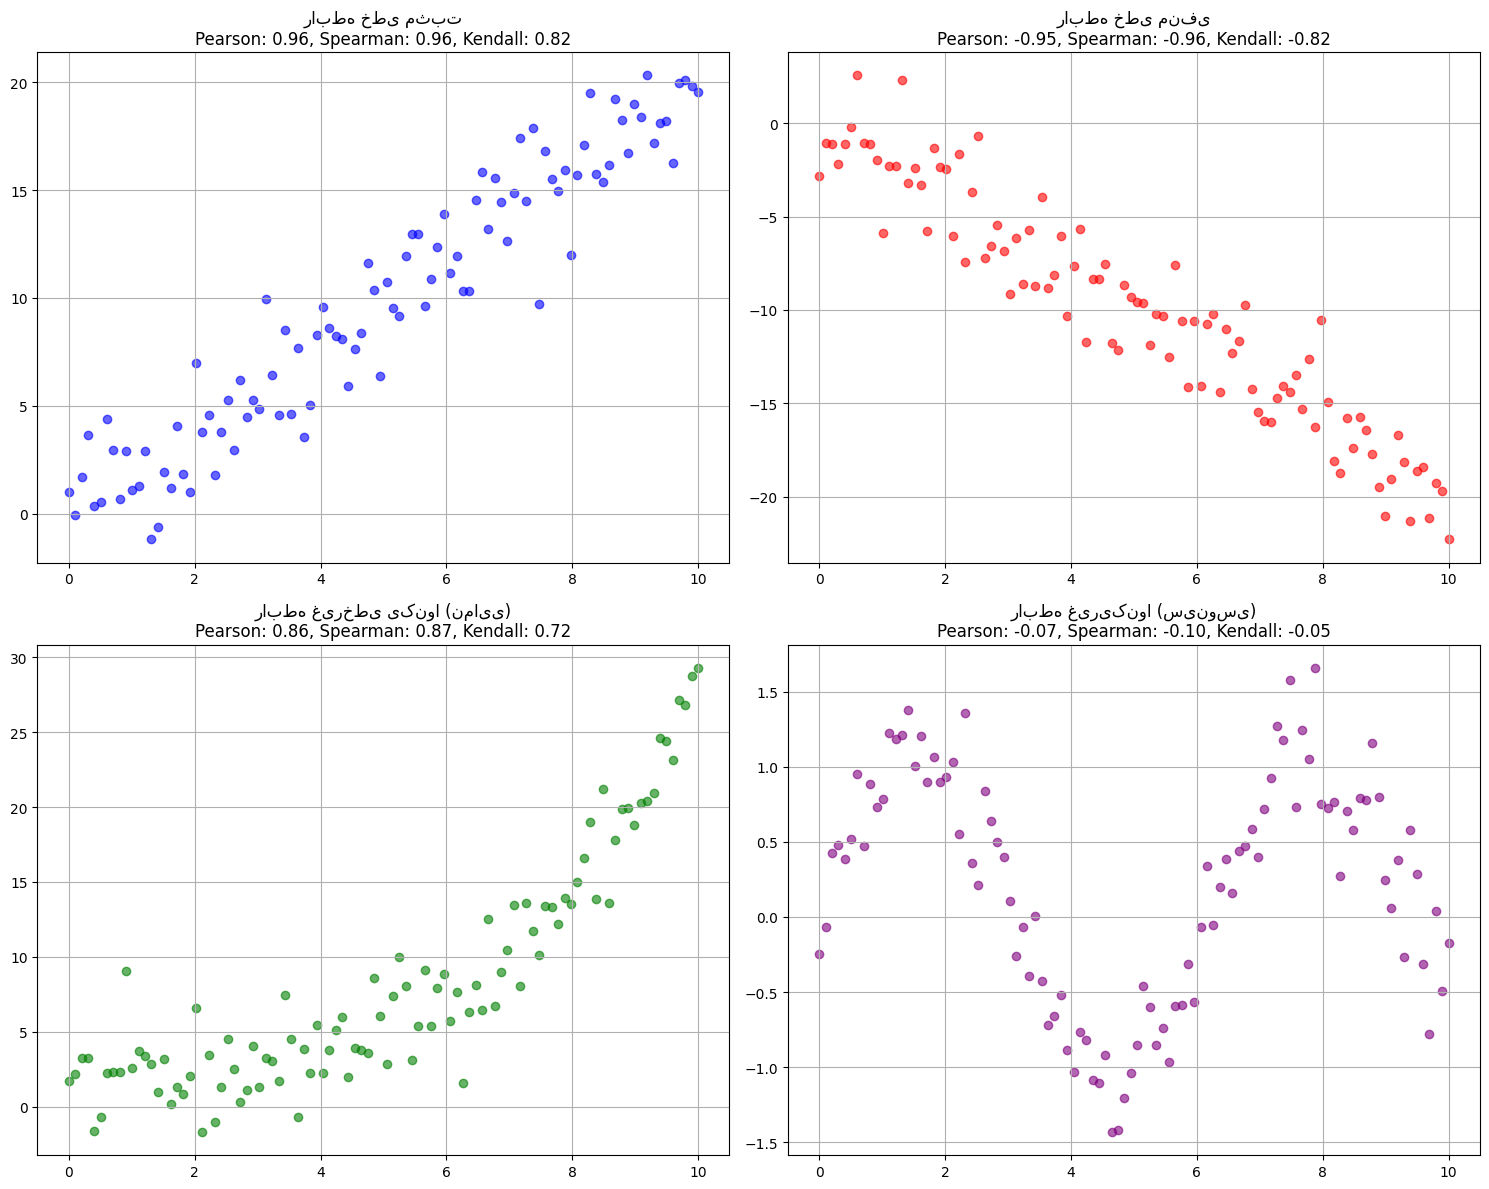

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau

# تنظیمات اولیه
plt.figure(figsize=(15, 12))
np.random.seed(42)

# 1. داده با رابطه خطی مثبت
x_linear = np.linspace(0, 10, 100)
y_linear = 2 * x_linear + np.random.normal(0, 2, 100)
corr_pearson_linear, _ = pearsonr(x_linear, y_linear)
corr_spearman_linear, _ = spearmanr(x_linear, y_linear)
corr_kendall_linear, _ = kendalltau(x_linear, y_linear)

# 2. داده با رابطه خطی منفی
y_negative = -2 * x_linear + np.random.normal(0, 2, 100)
corr_pearson_neg, _ = pearsonr(x_linear, y_negative)
corr_spearman_neg, _ = spearmanr(x_linear, y_negative)
corr_kendall_neg, _ = kendalltau(x_linear, y_negative)

# 3. داده با رابطه غیرخطی یکنوا (نمایی)
y_exp = np.exp(x_linear/3) + np.random.normal(0, 2, 100)
corr_pearson_exp, _ = pearsonr(x_linear, y_exp)
corr_spearman_exp, _ = spearmanr(x_linear, y_exp)
corr_kendall_exp, _ = kendalltau(x_linear, y_exp)

# 4. داده با رابطه غیریکنوا (سینوسی)
y_sin = np.sin(x_linear) + np.random.normal(0, 0.3, 100)
corr_pearson_sin, _ = pearsonr(x_linear, y_sin)
corr_spearman_sin, _ = spearmanr(x_linear, y_sin)
corr_kendall_sin, _ = kendalltau(x_linear, y_sin)

# رسم نمودارها
plt.subplot(2, 2, 1)
plt.scatter(x_linear, y_linear, color='blue', alpha=0.6)
plt.title(f'رابطه خطی مثبت\nPearson: {corr_pearson_linear:.2f}, Spearman: {corr_spearman_linear:.2f}, Kendall: {corr_kendall_linear:.2f}')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.scatter(x_linear, y_negative, color='red', alpha=0.6)
plt.title(f'رابطه خطی منفی\nPearson: {corr_pearson_neg:.2f}, Spearman: {corr_spearman_neg:.2f}, Kendall: {corr_kendall_neg:.2f}')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.scatter(x_linear, y_exp, color='green', alpha=0.6)
plt.title(f'رابطه غیرخطی یکنوا (نمایی)\nPearson: {corr_pearson_exp:.2f}, Spearman: {corr_spearman_exp:.2f}, Kendall: {corr_kendall_exp:.2f}')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.scatter(x_linear, y_sin, color='purple', alpha=0.6)
plt.title(f'رابطه غیریکنوا (سینوسی)\nPearson: {corr_pearson_sin:.2f}, Spearman: {corr_spearman_sin:.2f}, Kendall: {corr_kendall_sin:.2f}')
plt.grid(True)

plt.tight_layout()
plt.show()

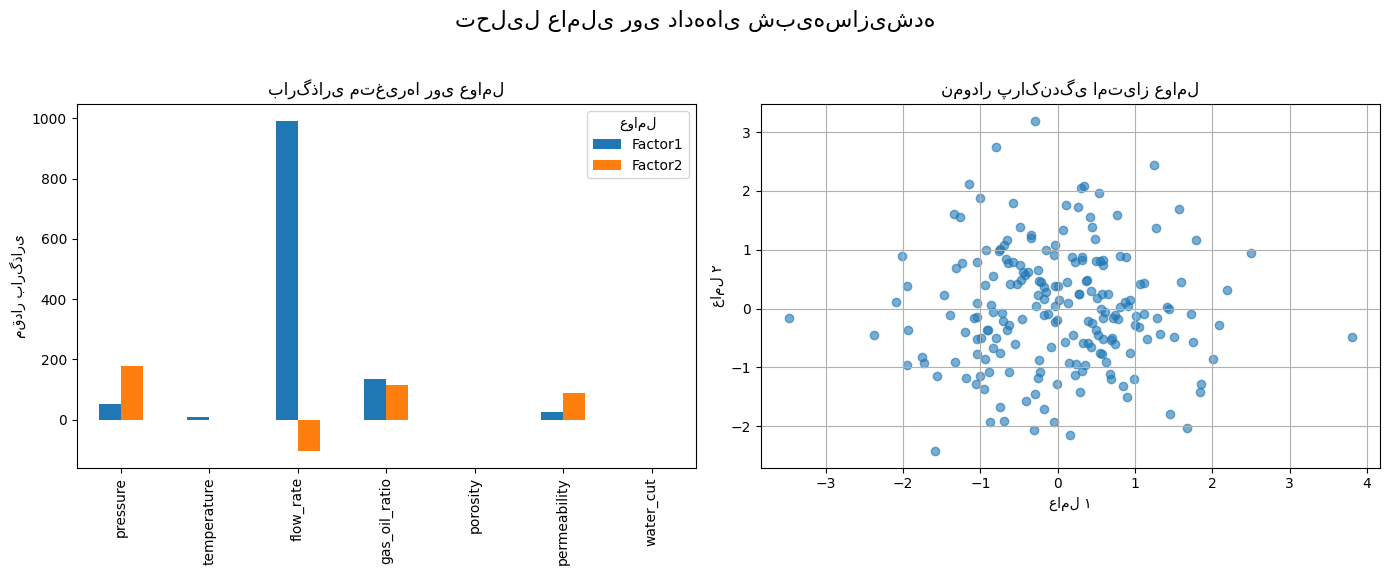

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

# شبیه‌سازی داده مصنوعی مرتبط با صنعت نفت و گاز
n = 200
np.random.seed(42)
F1 = np.random.normal(size=n)
F2 = np.random.normal(size=n)
noise = lambda size: np.random.normal(scale=0.5, size=size)

df = pd.DataFrame({
    'pressure': 3000 + 200 * F1 + noise(n),
    'temperature': 100 + 10 * F2 + noise(n),
    'flow_rate': 1000 * F2 + 100 * F1 + noise(n),
    'gas_oil_ratio': 500 + 150 * F1 + 100 * F2 + noise(n),
    'porosity': 0.2 + 0.05 * F1 + noise(n),
    'permeability': 100 * F1 + noise(n),
    'water_cut': 0.3 + 0.1 * F2 + noise(n)
})

# اجرای تحلیل عاملی با دو عامل
fa = FactorAnalysis(n_components=2, random_state=42)
fa.fit(df)
loadings = pd.DataFrame(fa.components_.T,
                        index=df.columns,
                        columns=['Factor1', 'Factor2'])
scores = pd.DataFrame(fa.transform(df),
                      columns=['Factor1', 'Factor2'])

# رسم نمودار بارگذاری و پراکنش امتیاز عوامل
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('تحلیل عاملی روی داده‌های شبیه‌سازی‌شده', fontsize=16)

# بارگذاری متغیرها روی عوامل به صورت نمودار میله‌ای گروهی
loadings.plot.bar(ax=axes[0])
axes[0].set_title('بارگذاری متغیرها روی عوامل')
axes[0].set_ylabel('مقدار بارگذاری')
axes[0].legend(title='عوامل')

# نمودار پراکندگی امتیاز عوامل
axes[1].scatter(scores['Factor1'], scores['Factor2'], alpha=0.6)
axes[1].set_title('نمودار پراکندگی امتیاز عوامل')
axes[1].set_xlabel('عامل ۱')
axes[1].set_ylabel('عامل ۲')
axes[1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
!pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 5.1 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=e42d38043aadbc95cb29ac1735372a38223783a26415b19551204b29685cfb55
  Stored in directory: /root/.cache/pip/wheels/d2/9a/31/fae291ff6a649bad125037eef8c7cc63d8c542e14bdcccea37
Successfully built semopy


TypeError: no numeric data to plot

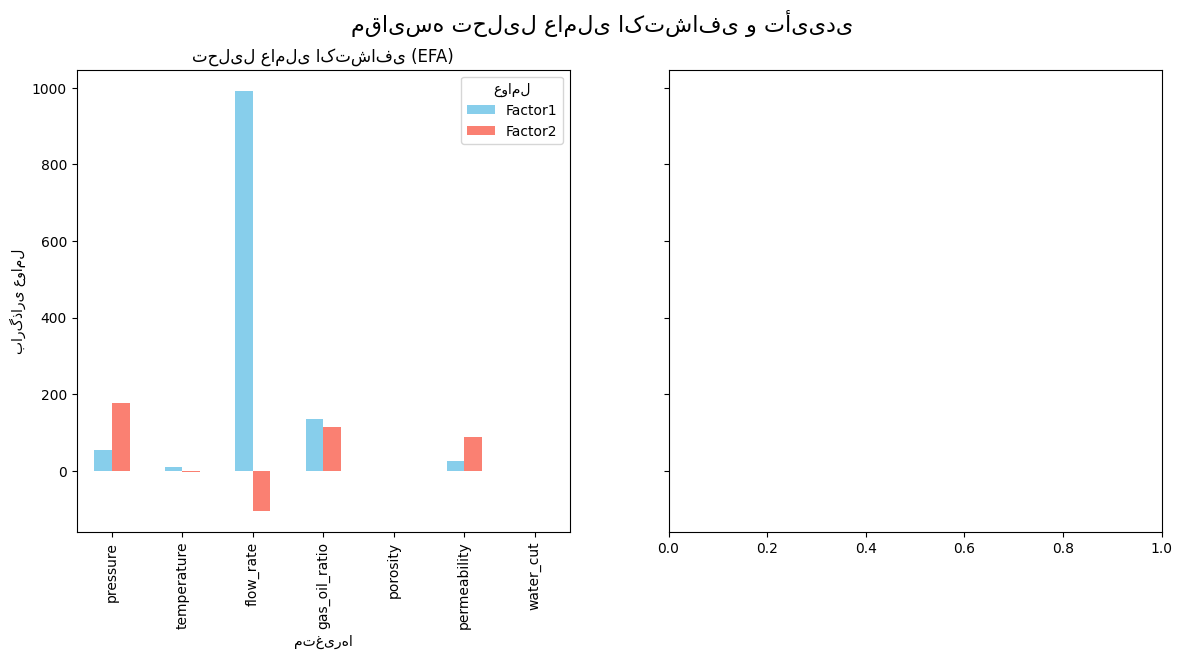

In [ ]:
# اجرای مجدد کدها پس از ریست شدن محیط

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from semopy import Model, Optimizer
from semopy.inspector import inspect

# شبیه‌سازی داده‌های مصنوعی
n = 200
np.random.seed(42)
F1 = np.random.normal(size=n)
F2 = np.random.normal(size=n)
noise = lambda size: np.random.normal(scale=0.5, size=size)

df = pd.DataFrame({
    'pressure': 3000 + 200 * F1 + noise(n),
    'temperature': 100 + 10 * F2 + noise(n),
    'flow_rate': 1000 * F2 + 100 * F1 + noise(n),
    'gas_oil_ratio': 500 + 150 * F1 + 100 * F2 + noise(n),
    'porosity': 0.2 + 0.05 * F1 + noise(n),
    'permeability': 100 * F1 + noise(n),
    'water_cut': 0.3 + 0.1 * F2 + noise(n)
})

# تحلیل عاملی اکتشافی (EFA)
fa = FactorAnalysis(n_components=2, random_state=42)
fa.fit(df)
efa_loadings = pd.DataFrame(fa.components_.T,
                            index=df.columns,
                            columns=['Factor1', 'Factor2'])

# تحلیل عاملی تأییدی (CFA)
model_desc = """
Factor1 =~ pressure + porosity + permeability
Factor2 =~ flow_rate + gas_oil_ratio + water_cut
"""
mod = Model(model_desc)
res = mod.fit(df)
cfa_loadings = inspect(mod, what='std')[['lval', 'op', 'rval', 'Estimate']]
cfa_loadings = cfa_loadings[cfa_loadings['op'] == '=~']
cfa_loadings = cfa_loadings.pivot(index='rval', columns='lval', values='Estimate').fillna(0)

# رسم نمودار بارگذاری‌های EFA و CFA در کنار هم
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle('مقایسه تحلیل عاملی اکتشافی و تأییدی', fontsize=16)

# نمودار تحلیل اکتشافی
efa_loadings.plot.bar(ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('تحلیل عاملی اکتشافی (EFA)')
axes[0].set_ylabel('بارگذاری عوامل')
axes[0].set_xlabel('متغیرها')
axes[0].legend(title='عوامل')

# نمودار تحلیل تأییدی
cfa_loadings.plot.bar(ax=axes[1], color=['skyblue', 'salmon'])
axes[1].set_title('تحلیل عاملی تأییدی (CFA)')
axes[1].set_xlabel('متغیرها')
axes[1].legend(title='عوامل')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# بررسی مقادیر CFA
print(cfa_loadings)

# حذف ردیف‌های غیرعددی (در صورت وجود)
cfa_loadings = cfa_loadings.apply(pd.to_numeric, errors='coerce')
cfa_loadings = cfa_loadings.dropna()

# رسم اگر داده‌ها موجود بودند
if not cfa_loadings.empty:
    cfa_loadings.plot.bar(ax=axes[1], color=['skyblue', 'salmon'])
else:
    print("داده‌های عددی کافی برای رسم CFA یافت نشد.")

Empty DataFrame
Columns: []
Index: []
داده‌های عددی کافی برای رسم CFA یافت نشد.


هشدار: داده‌های عددی کافی برای رسم نمودار CFA یافت نشد.


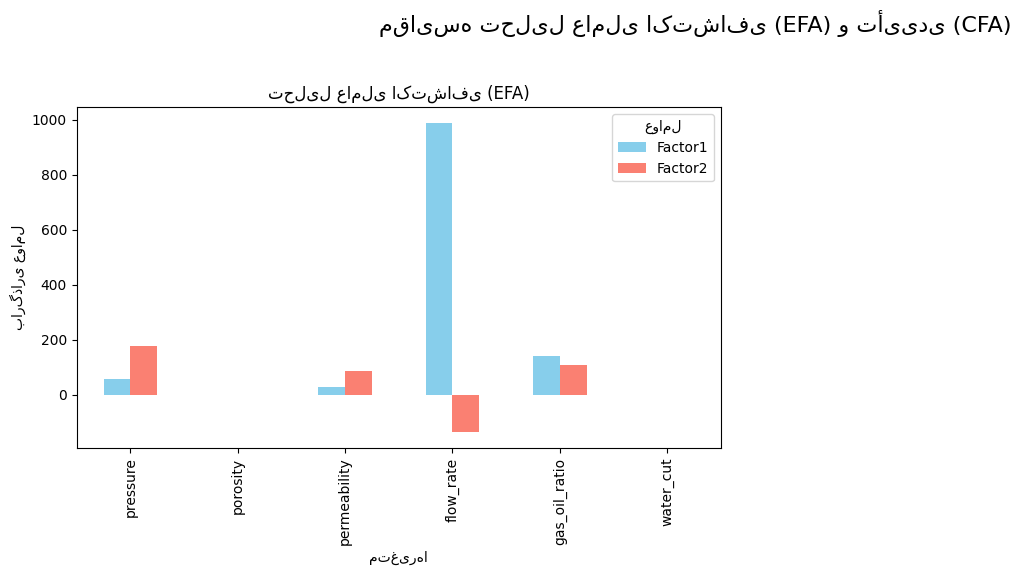

In [ ]:
# نصب کتابخانه لازم برای CFA
!pip install semopy

# وارد کردن کتابخانه‌ها
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from semopy import Model
from semopy.inspector import inspect

# شبیه‌سازی داده‌های مصنوعی مرتبط با صنعت نفت و گاز
np.random.seed(42)
n = 200
F1 = np.random.normal(size=n)  # عامل مخزنی
F2 = np.random.normal(size=n)  # عامل بهره‌برداری
noise = lambda size: np.random.normal(scale=0.5, size=size)

df = pd.DataFrame({
    'pressure': 3000 + 200 * F1 + noise(n),
    'porosity': 0.2 + 0.05 * F1 + noise(n),
    'permeability': 100 * F1 + noise(n),
    'flow_rate': 1000 * F2 + 100 * F1 + noise(n),
    'gas_oil_ratio': 500 + 150 * F1 + 100 * F2 + noise(n),
    'water_cut': 0.3 + 0.1 * F2 + noise(n)
})

# تحلیل عاملی اکتشافی (EFA)
fa = FactorAnalysis(n_components=2, random_state=42)
fa.fit(df)
efa_loadings = pd.DataFrame(fa.components_.T, index=df.columns, columns=['Factor1', 'Factor2'])

# تحلیل عاملی تأییدی (CFA)
model_desc = """
Factor1 =~ pressure + porosity + permeability
Factor2 =~ flow_rate + gas_oil_ratio + water_cut
"""
mod = Model(model_desc)
mod.fit(df)
cfa_raw = inspect(mod, what='est')
cfa_loadings = cfa_raw[cfa_raw['op'] == '=~'][['lval', 'rval', 'Estimate']]
cfa_loadings = cfa_loadings.pivot(index='rval', columns='lval', values='Estimate').fillna(0)

# رسم نمودار مقایسه EFA و CFA
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle('مقایسه تحلیل عاملی اکتشافی (EFA) و تأییدی (CFA)', fontsize=16)

# نمودار EFA
efa_loadings.plot.bar(ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('تحلیل عاملی اکتشافی (EFA)')
axes[0].set_ylabel('بارگذاری عوامل')
axes[0].set_xlabel('متغیرها')
axes[0].legend(title='عوامل')

# نمودار CFA (در صورت وجود داده عددی)
cfa_loadings = cfa_loadings.apply(pd.to_numeric, errors='coerce').dropna()
if not cfa_loadings.empty:
    cfa_loadings.plot.bar(ax=axes[1], color=['skyblue', 'salmon'])
    axes[1].set_title('تحلیل عاملی تأییدی (CFA)')
    axes[1].set_xlabel('متغیرها')
    axes[1].legend(title='عوامل')
else:
    axes[1].set_visible(False)
    print("هشدار: داده‌های عددی کافی برای رسم نمودار CFA یافت نشد.")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

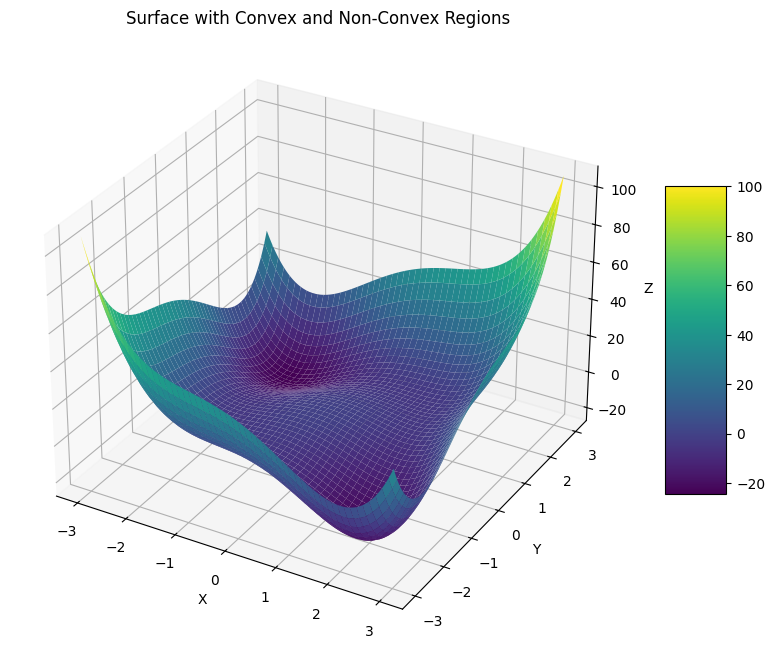

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# تعریف دامنه x و y
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
x, y = np.meshgrid(x, y)

# تابع سطح سه‌بعدی
z = x**4 + y**4 - 5*(x**2 + y**2) + 4*x*y

# رسم نمودار
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

# تنظیمات ظاهری
ax.set_title('Surface with Convex and Non-Convex Regions')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
!pip install deap matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 10.2 MB/s eta 0:00:00


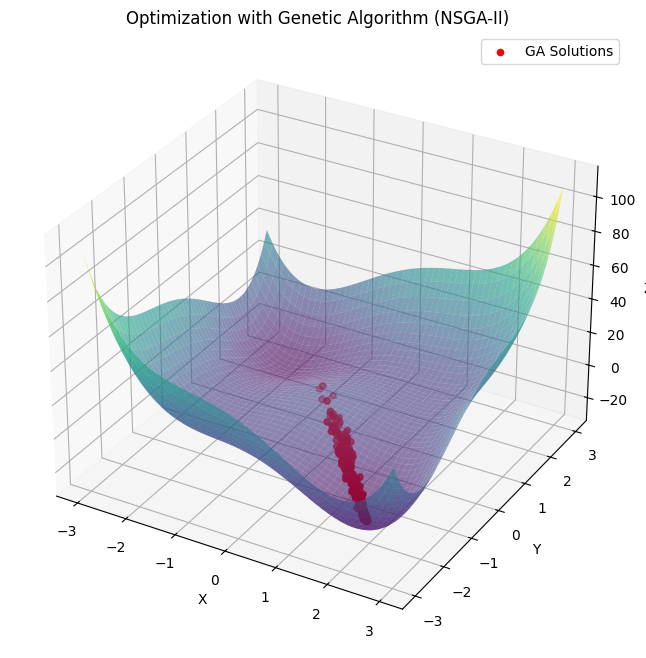

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from deap import base, creator, tools, algorithms

# تابع هدف: بازگشت دو مقدار (برای چندهدفه)
def objective(individual):
    x, y = individual
    f1 = x**4 + y**4 - 5*(x**2 + y**2) + 4*x*y
    f2 = x**2 + y**2  # معیار دوم (مثلاً فاصله از مبدأ)
    return f1, f2

# تنظیمات DEAP
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0))  # کمینه‌سازی
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -3, 3)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", objective)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.5, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

# اجرا
population = toolbox.population(n=200)
algorithms.eaMuPlusLambda(population, toolbox, mu=200, lambda_=400, cxpb=0.7, mutpb=0.3, ngen=40, verbose=False)

# استخراج نقاط بهینه شده
X = [ind[0] for ind in population]
Y = [ind[1] for ind in population]
Z = [ind.fitness.values[0] for ind in population]

# رسم نمودار سه‌بعدی سطح و نقاط بهینه
x_vals = np.linspace(-3, 3, 200)
y_vals = np.linspace(-3, 3, 200)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)
z_grid = x_grid**4 + y_grid**4 - 5*(x_grid**2 + y_grid**2) + 4*x_grid*y_grid

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', alpha=0.6, edgecolor='none')
ax.scatter(X, Y, Z, color='red', label='GA Solutions')

ax.set_title("Optimization with Genetic Algorithm (NSGA-II)")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

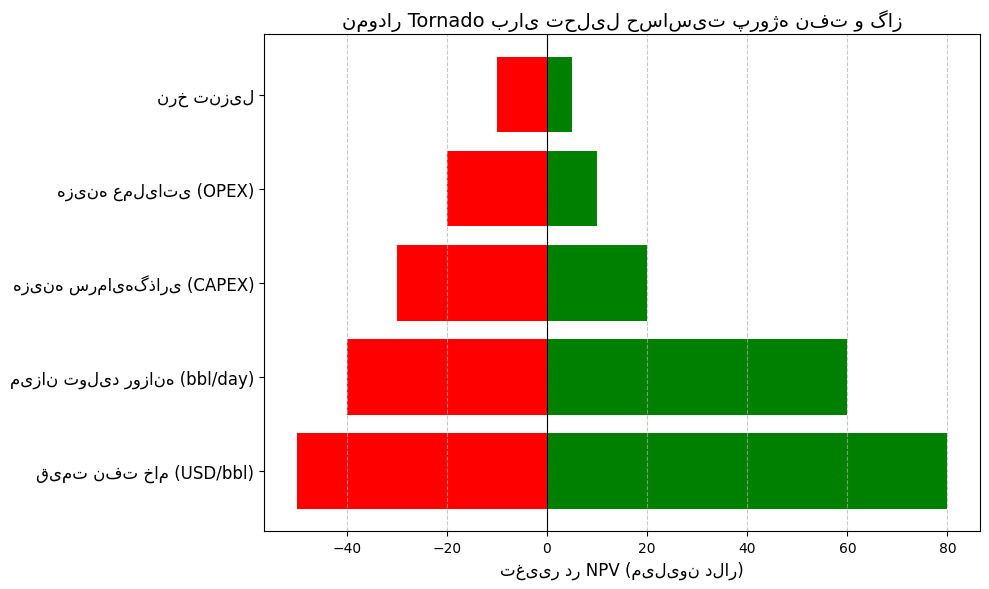

In [ ]:
import matplotlib.pyplot as plt

# پارامترها و تغییرات NPV مربوط به هرکدام (داده‌های فرضی)
parameters = [
    "قیمت نفت خام (USD/bbl)",
    "میزان تولید روزانه (bbl/day)",
    "هزینه سرمایه‌گذاری (CAPEX)",
    "هزینه عملیاتی (OPEX)",
    "نرخ تنزیل"
]

# تغییرات NPV در سناریوهای بدبینانه و خوش‌بینانه
low_values = [-50, -40, -30, -20, -10]   # میلیون دلار کاهش
high_values = [80, 60, 20, 10, 5]        # میلیون دلار افزایش

# موقعیت‌ها برای رسم میله‌ها
positions = list(range(len(parameters)))

fig, ax = plt.subplots(figsize=(10, 6))

# رسم میله‌ها
for i, (low, high) in enumerate(zip(low_values, high_values)):
    ax.barh(positions[i], high, color='green', left=0)
    ax.barh(positions[i], low, color='red', left=0)

# تنظیمات نمودار
ax.set_yticks(positions)
ax.set_yticklabels(parameters, fontsize=12)
ax.set_xlabel('تغییر در NPV (میلیون دلار)', fontsize=12)
ax.set_title('نمودار Tornado برای تحلیل حساسیت پروژه نفت و گاز', fontsize=14)
ax.axvline(0, color='black', linewidth=0.8)
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

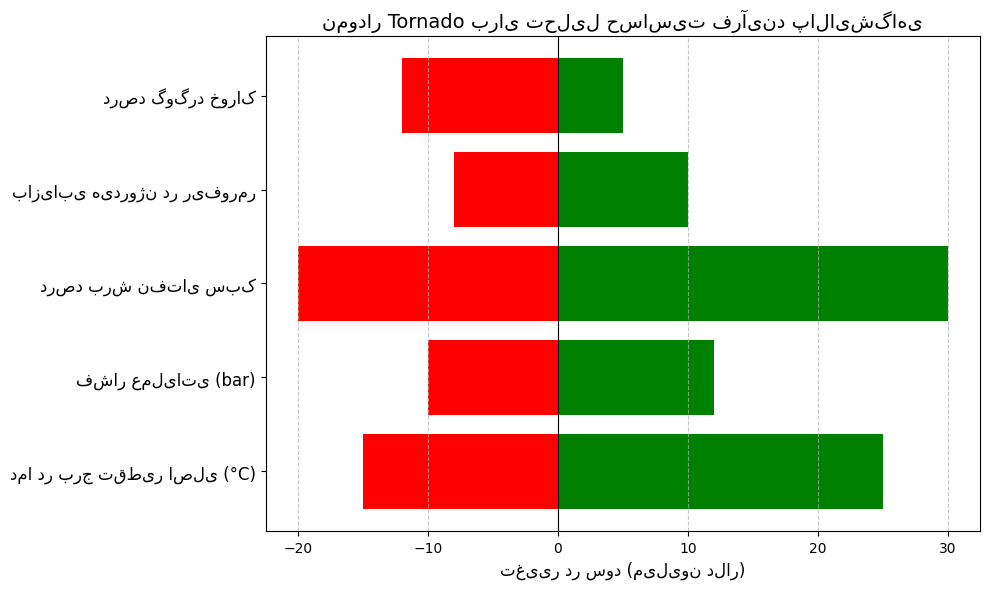

In [ ]:
import matplotlib.pyplot as plt

# پارامترهای کلیدی در یک فرآیند پالایشگاهی (مثلاً تولید بنزین)
parameters = [
    "دما در برج تقطیر اصلی (°C)",
    "فشار عملیاتی (bar)",
    "درصد برش نفتای سبک",
    "بازیابی هیدروژن در ریفورمر",
    "درصد گوگرد خوراک"
]

# تغییرات فرضی در مقدار سودآوری (Profit) به میلیون دلار
# مقادیر بر اساس سناریوی بدبینانه (منفی) و خوش‌بینانه (مثبت)
low_values = [-15, -10, -20, -8, -12]   # میلیون دلار کاهش سود
high_values = [25, 12, 30, 10, 5]       # میلیون دلار افزایش سود

positions = list(range(len(parameters)))

# رسم نمودار Tornado برای تحلیل حساسیت سود فرآیند پالایشگاهی
fig, ax = plt.subplots(figsize=(10, 6))

for i, (low, high) in enumerate(zip(low_values, high_values)):
    ax.barh(positions[i], high, color='green', left=0)
    ax.barh(positions[i], low, color='red', left=0)

ax.set_yticks(positions)
ax.set_yticklabels(parameters, fontsize=12)
ax.set_xlabel('تغییر در سود (میلیون دلار)', fontsize=12)
ax.set_title('نمودار Tornado برای تحلیل حساسیت فرآیند پالایشگاهی', fontsize=14)
ax.axvline(0, color='black', linewidth=0.8)
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

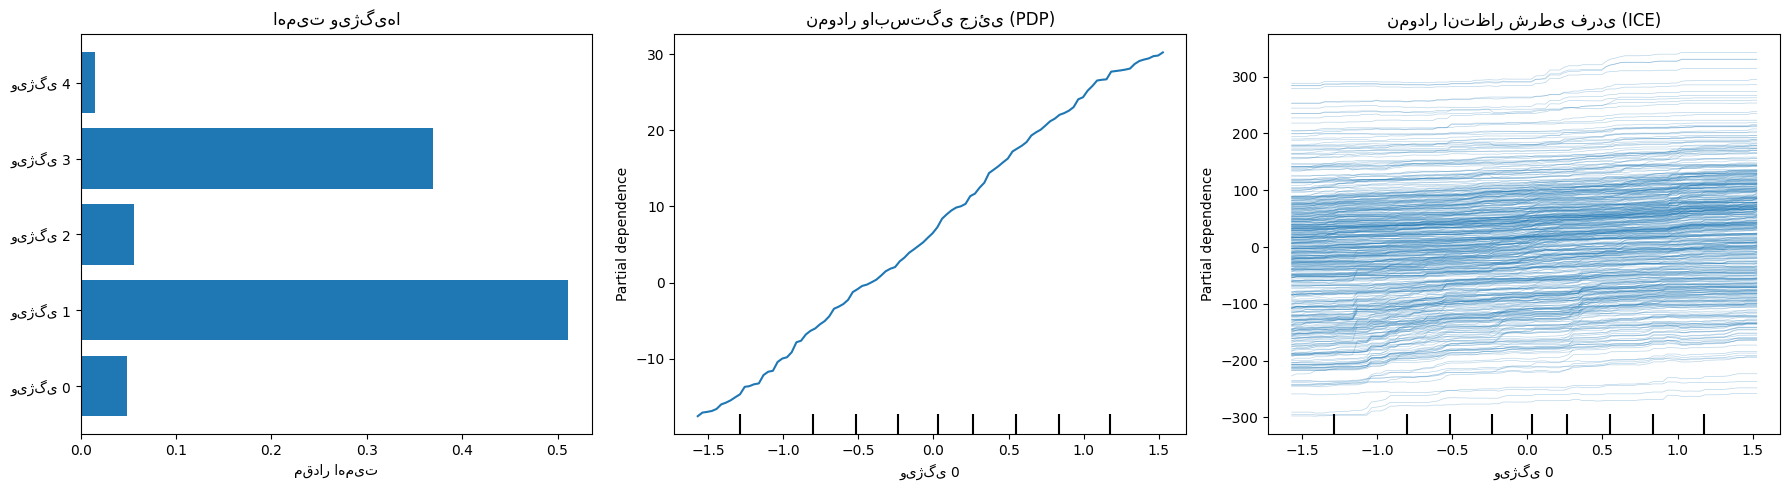

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.datasets import make_regression

# ایجاد داده‌های مصنوعی
X, y = make_regression(n_samples=500, n_features=5, noise=0.1, random_state=42)
feature_names = [f'ویژگی {i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)

# آموزش مدل
model = RandomForestRegressor(random_state=42)
model.fit(df, y)

# انتخاب ویژگی برای PDP و ICE
selected_feature = feature_names[0]

# ایجاد شکل و زیرنمودارها
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# نمودار اهمیت ویژگی‌ها
importances = model.feature_importances_
axes[0].barh(feature_names, importances)
axes[0].set_title('اهمیت ویژگی‌ها')
axes[0].set_xlabel('مقدار اهمیت')

# نمودار وابستگی جزئی (PDP)
PartialDependenceDisplay.from_estimator(model, df, [selected_feature], ax=axes[1], kind='average')
axes[1].set_title('نمودار وابستگی جزئی (PDP)')

# نمودار انتظار شرطی فردی (ICE)
PartialDependenceDisplay.from_estimator(model, df, [selected_feature], ax=axes[2], kind='individual')
axes[2].set_title('نمودار انتظار شرطی فردی (ICE)')

plt.tight_layout()
plt.show()

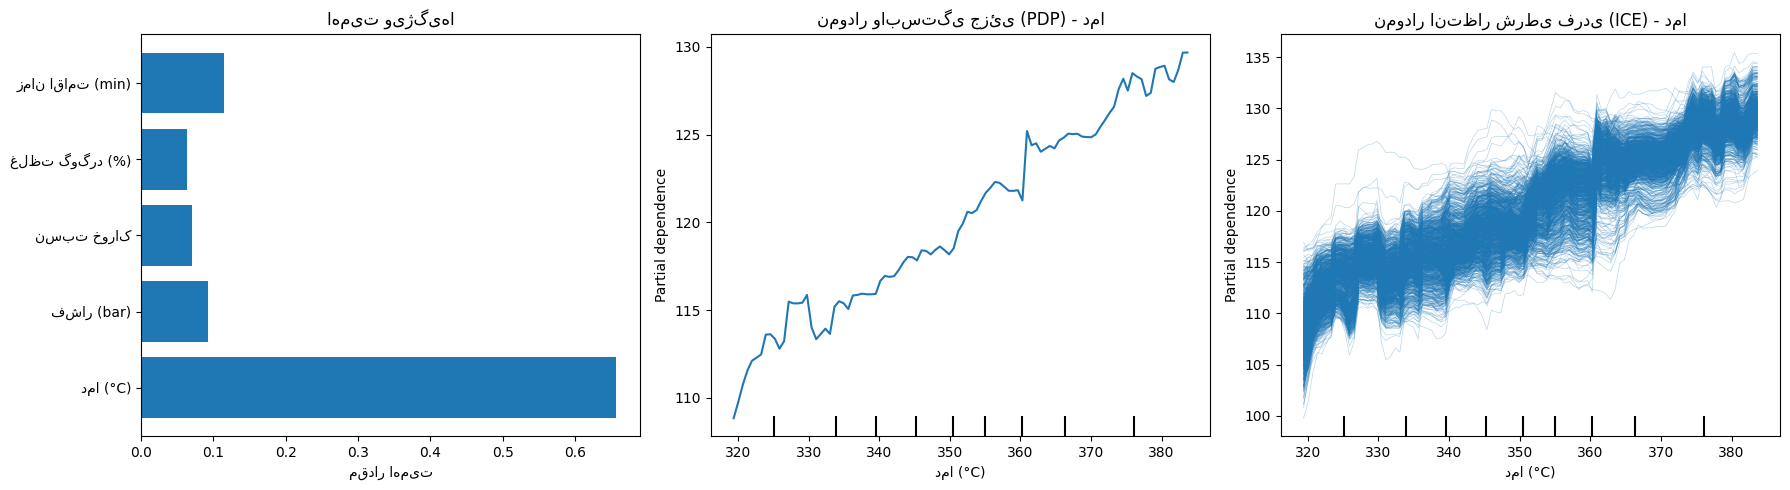

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay

# ایجاد داده‌های مصنوعی مرتبط با پالایشگاه
np.random.seed(42)
n_samples = 1000
data = {
    'دما (°C)': np.random.normal(350, 20, n_samples),  # دمای عملیاتی
    'فشار (bar)': np.random.normal(30, 5, n_samples),  # فشار عملیاتی
    'نسبت خوراک': np.random.uniform(0.5, 1.5, n_samples),  # نسبت خوراک ورودی
    'غلظت گوگرد (%)': np.random.uniform(0.1, 2.0, n_samples),  # غلظت گوگرد
    'زمان اقامت (min)': np.random.normal(60, 10, n_samples),  # زمان اقامت در واحد
}

df = pd.DataFrame(data)

# تعریف متغیر هدف: بازدهی محصول (مثلاً درصد تبدیل نفت خام به بنزین)
# این متغیر به صورت مصنوعی بر اساس ویژگی‌ها تعریف می‌شود
df['بازدهی محصول (%)'] = (
    0.3 * df['دما (°C)'] +
    0.2 * df['فشار (bar)'] +
    0.1 * df['نسبت خوراک'] -
    0.25 * df['غلظت گوگرد (%)'] +
    0.15 * df['زمان اقامت (min)'] +
    np.random.normal(0, 5, n_samples)  # افزودن نویز
)

# جداسازی ویژگی‌ها و متغیر هدف
X = df.drop('بازدهی محصول (%)', axis=1)
y = df['بازدهی محصول (%)']

# آموزش مدل Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# ترسیم نمودارها
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# نمودار اهمیت ویژگی‌ها
importances = model.feature_importances_
axes[0].barh(X.columns, importances)
axes[0].set_title('اهمیت ویژگی‌ها')
axes[0].set_xlabel('مقدار اهمیت')

# نمودار وابستگی جزئی (PDP) برای 'دما (°C)'
PartialDependenceDisplay.from_estimator(model, X, ['دما (°C)'], ax=axes[1], kind='average')
axes[1].set_title('نمودار وابستگی جزئی (PDP) - دما')

# نمودار انتظار شرطی فردی (ICE) برای 'دما (°C)'
PartialDependenceDisplay.from_estimator(model, X, ['دما (°C)'], ax=axes[2], kind='individual')
axes[2].set_title('نمودار انتظار شرطی فردی (ICE) - دما')

plt.tight_layout()
plt.show()

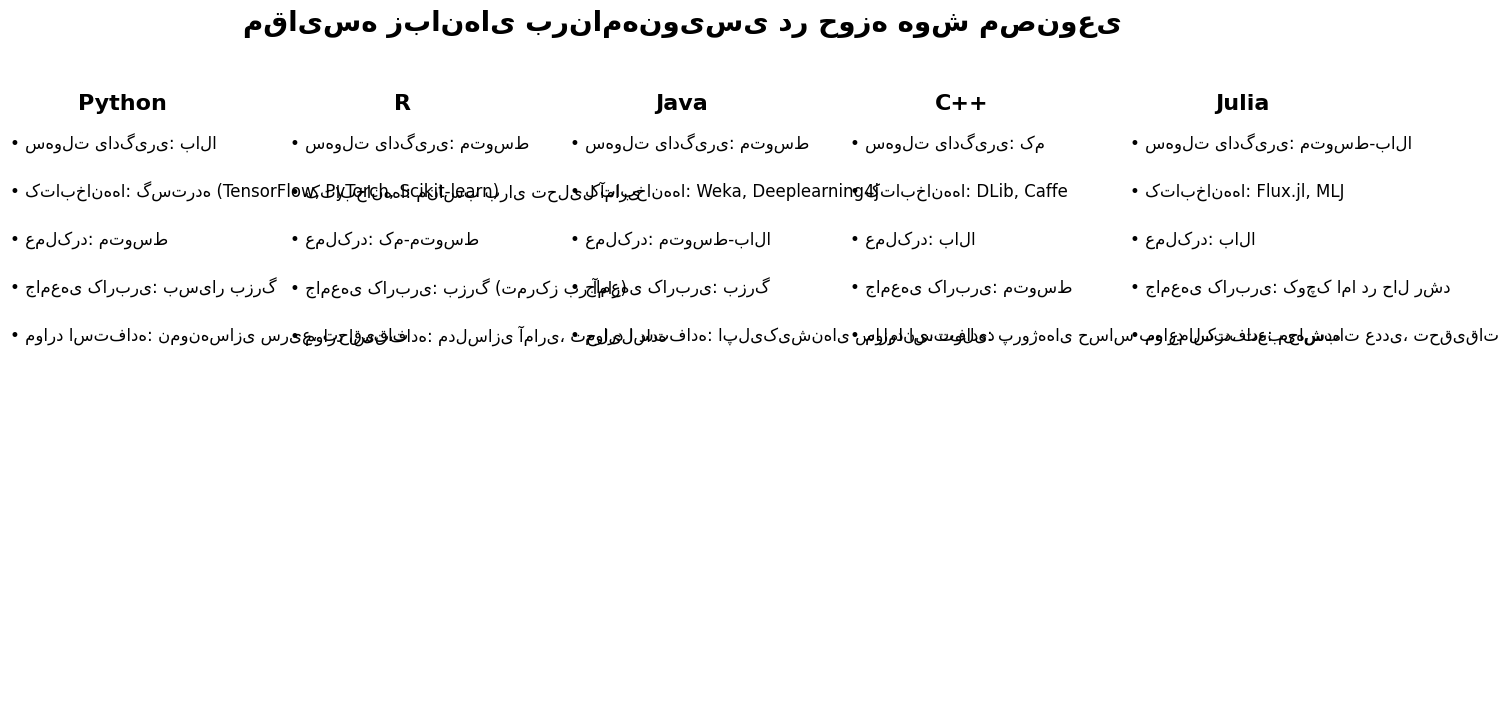

In [ ]:
import matplotlib.pyplot as plt

# Data for languages
languages = [
    {
        "name": "Python",
        "metrics": [
            "سهولت یادگیری: بالا",
            "کتابخانه‌ها: گسترده (TensorFlow, PyTorch, Scikit-learn)",
            "عملکرد: متوسط",
            "جامعه‌ی کاربری: بسیار بزرگ",
            "موارد استفاده: نمونه‌سازی سریع، تحقیقات"
        ]
    },
    {
        "name": "R",
        "metrics": [
            "سهولت یادگیری: متوسط",
            "کتابخانه‌ها: مناسب برای تحلیل آماری",
            "عملکرد: کم-متوسط",
            "جامعه‌ی کاربری: بزرگ (تمرکز بر آمار)",
            "موارد استفاده: مدل‌سازی آماری، تحلیل داده"
        ]
    },
    {
        "name": "Java",
        "metrics": [
            "سهولت یادگیری: متوسط",
            "کتابخانه‌ها: Weka, Deeplearning4j",
            "عملکرد: متوسط-بالا",
            "جامعه‌ی کاربری: بزرگ",
            "موارد استفاده: اپلیکیشن‌های سازمانی، تولید"
        ]
    },
    {
        "name": "C++",
        "metrics": [
            "سهولت یادگیری: کم",
            "کتابخانه‌ها: DLib, Caffe",
            "عملکرد: بالا",
            "جامعه‌ی کاربری: متوسط",
            "موارد استفاده: پروژه‌های حساس به عملکرد، تعبیه‌شده"
        ]
    },
    {
        "name": "Julia",
        "metrics": [
            "سهولت یادگیری: متوسط-بالا",
            "کتابخانه‌ها: Flux.jl, MLJ",
            "عملکرد: بالا",
            "جامعه‌ی کاربری: کوچک اما در حال رشد",
            "موارد استفاده: محاسبات عددی، تحقیقات"
        ]
    }
]

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('off')

# Title
fig.text(0.5, 0.95, "مقایسه زبان‌های برنامه‌نویسی در حوزه هوش مصنوعی", ha='center', va='center', fontsize=20, weight='bold')

# Positions for columns
x_positions = [0.1, 0.3, 0.5, 0.7, 0.9]
y_title = 0.85
y_start = 0.80
y_step = 0.06

for i, lang in enumerate(languages):
    x = x_positions[i]
    # Language name
    fig.text(x, y_title, lang["name"], ha='center', va='center', fontsize=16, weight='bold')
    # Metrics
    for j, metric in enumerate(lang["metrics"]):
        fig.text(x - 0.08, y_start - j * y_step, f"• {metric}", ha='left', va='center', fontsize=12)

plt.show()

In [ ]:
!pip install python-bidi arabic_reshaper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 4.7 MB/s eta 0:00:00


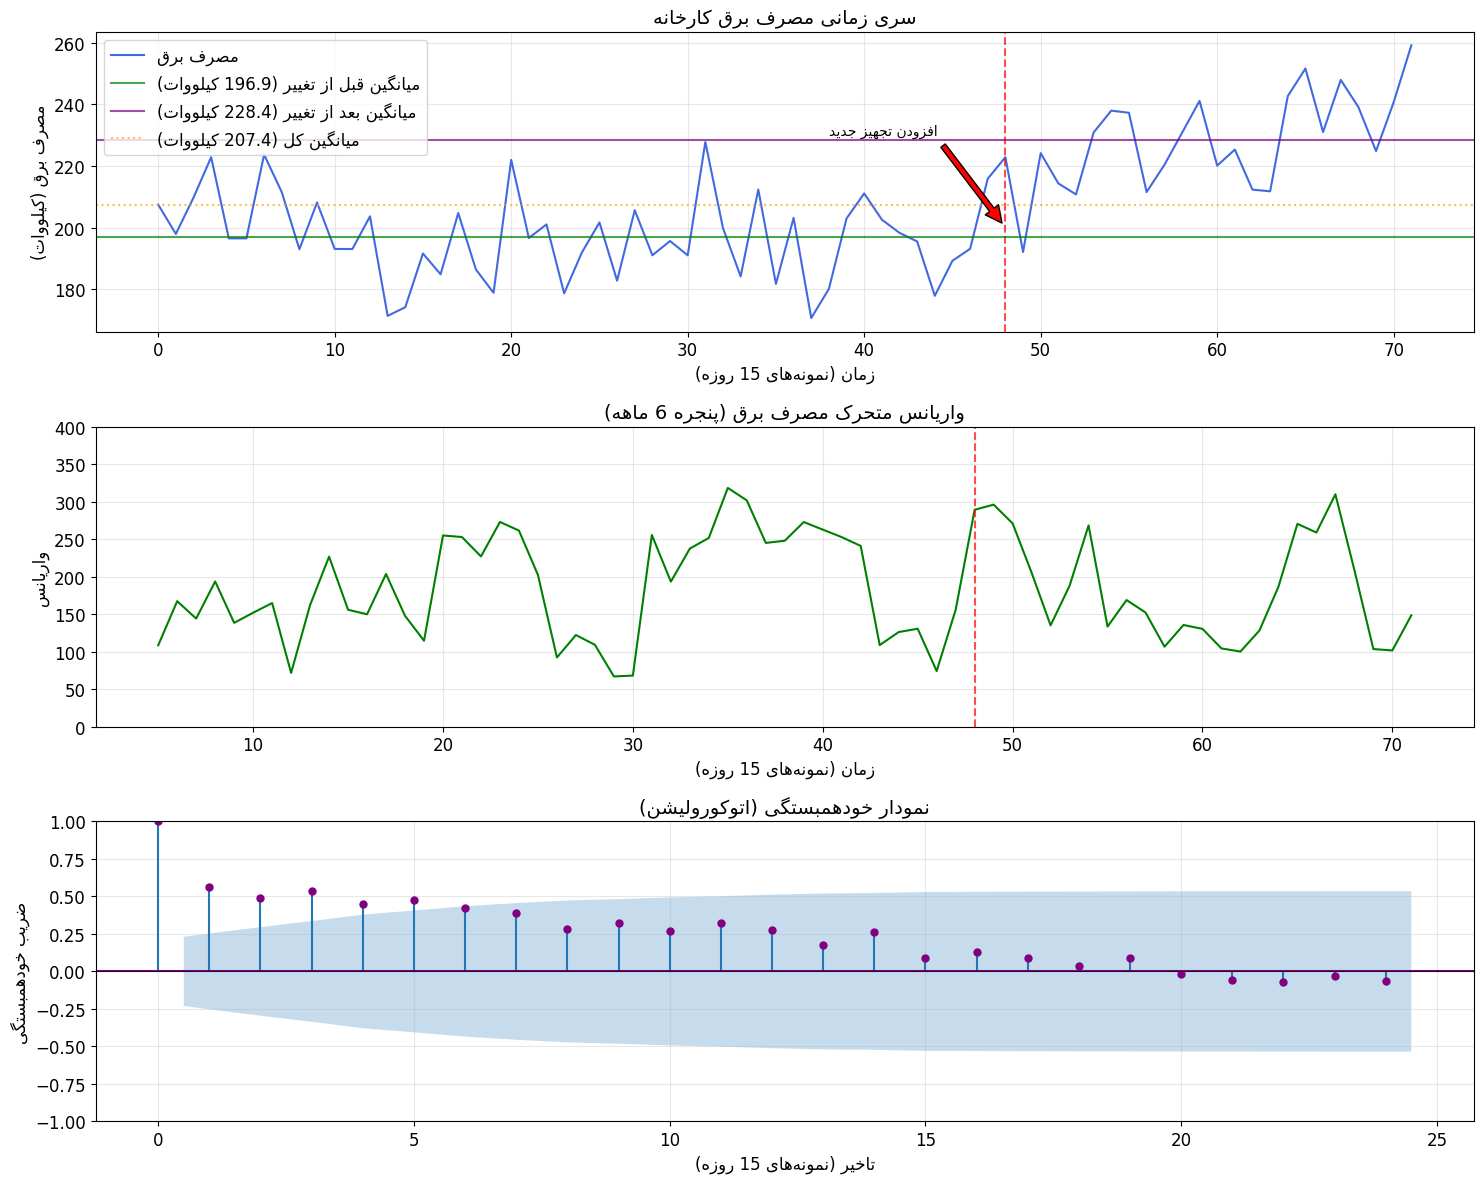

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import arabic_reshaper
from bidi.algorithm import get_display

# تابع برای نمایش صحیح متون فارسی
def bidi_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# تنظیمات اولیه
np.random.seed(42)
samples_per_year = 24  # نمونه‌های ماهانه (هر 15 روز)
total_samples = 3 * samples_per_year  # ۳ سال داده

# تولید داده‌های مصنوعی
time = np.arange(total_samples)

# ۱. دو سال اول: میانگین ۲۰۰ کیلووات با نوسان تصادفی
consumption = 200 + np.random.normal(0, 15, 2*samples_per_year)

# ۲. سال سوم: روند افزایشی پس از افزودن تجهیز جدید
trend_start = 2 * samples_per_year
trend = 0.8 * (time[trend_start:] - trend_start)  # روند خطی افزایشی
noise = np.random.normal(0, 15, samples_per_year)
new_consumption = 200 + trend + noise + np.random.uniform(10, 20)  # افزایش ناگهانی

# ترکیب داده‌ها
consumption = np.concatenate([consumption, new_consumption])

# ایجاد دیتافریم
df = pd.DataFrame({
    'زمان': time,
    'مصرف_برق': consumption
})

# محاسبه میانگین‌ها
mean_before = np.mean(consumption[:trend_start])
mean_after = np.mean(consumption[trend_start:])
overall_mean = np.mean(consumption)

# محاسبه واریانس متحرک (با پنجره 6 ماهه)
df['واریانس_متحرک'] = df['مصرف_برق'].rolling(window=6).var()

# تنظیم فونت
plt.rcParams['font.family'] = 'B Nazanin'
plt.rcParams['font.size'] = 12

# ایجاد نمودارها
fig = plt.figure(figsize=(15, 12))

# نمودار ۱: سری زمانی مصرف برق
ax1 = plt.subplot(3, 1, 1)
ax1.plot(df['زمان'], df['مصرف_برق'], color='royalblue', linewidth=1.5, label=bidi_text('مصرف برق'))
ax1.axvline(x=trend_start, color='red', linestyle='--', alpha=0.7)

# خطوط میانگین
ax1.axhline(y=mean_before, color='green', linestyle='-', alpha=0.7,
           label=bidi_text(f'میانگین قبل از تغییر ({mean_before:.1f} کیلووات)'))
ax1.axhline(y=mean_after, color='purple', linestyle='-', alpha=0.7,
           label=bidi_text(f'میانگین بعد از تغییر ({mean_after:.1f} کیلووات)'))
ax1.axhline(y=overall_mean, color='orange', linestyle=':', alpha=0.7,
           label=bidi_text(f'میانگین کل ({overall_mean:.1f} کیلووات)'))

ax1.set_title(bidi_text('سری زمانی مصرف برق کارخانه'), fontsize=14)
ax1.set_xlabel(bidi_text('زمان (نمونه‌های 15 روزه)'), fontsize=12)
ax1.set_ylabel(bidi_text('مصرف برق (کیلووات)'), fontsize=12)
ax1.grid(alpha=0.3)
ax1.annotate(bidi_text('افزودن تجهیز جدید'),
             xy=(trend_start, 200),
             xytext=(trend_start-10, 230),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10)
ax1.legend(loc='upper left')

# نمودار ۲: واریانس متحرک
ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['زمان'], df['واریانس_متحرک'], color='green', linewidth=1.5)
ax2.axvline(x=trend_start, color='red', linestyle='--', alpha=0.7)
ax2.set_title(bidi_text('واریانس متحرک مصرف برق (پنجره 6 ماهه)'), fontsize=14)
ax2.set_xlabel(bidi_text('زمان (نمونه‌های 15 روزه)'), fontsize=12)
ax2.set_ylabel(bidi_text('واریانس'), fontsize=12)
ax2.grid(alpha=0.3)
ax2.set_ylim(0, 400)

# نمودار ۳: خودهمبستگی
ax3 = plt.subplot(3, 1, 3)
plot_acf(df['مصرف_برق'], lags=24, ax=ax3, color='purple')
ax3.set_title(bidi_text('نمودار خودهمبستگی (اتوکورولیشن)'), fontsize=14)
ax3.set_xlabel(bidi_text('تاخیر (نمونه‌های 15 روزه)'), fontsize=12)
ax3.set_ylabel(bidi_text('ضریب خودهمبستگی'), fontsize=12)
ax3.grid(alpha=0.3)
ax3.axhline(y=0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

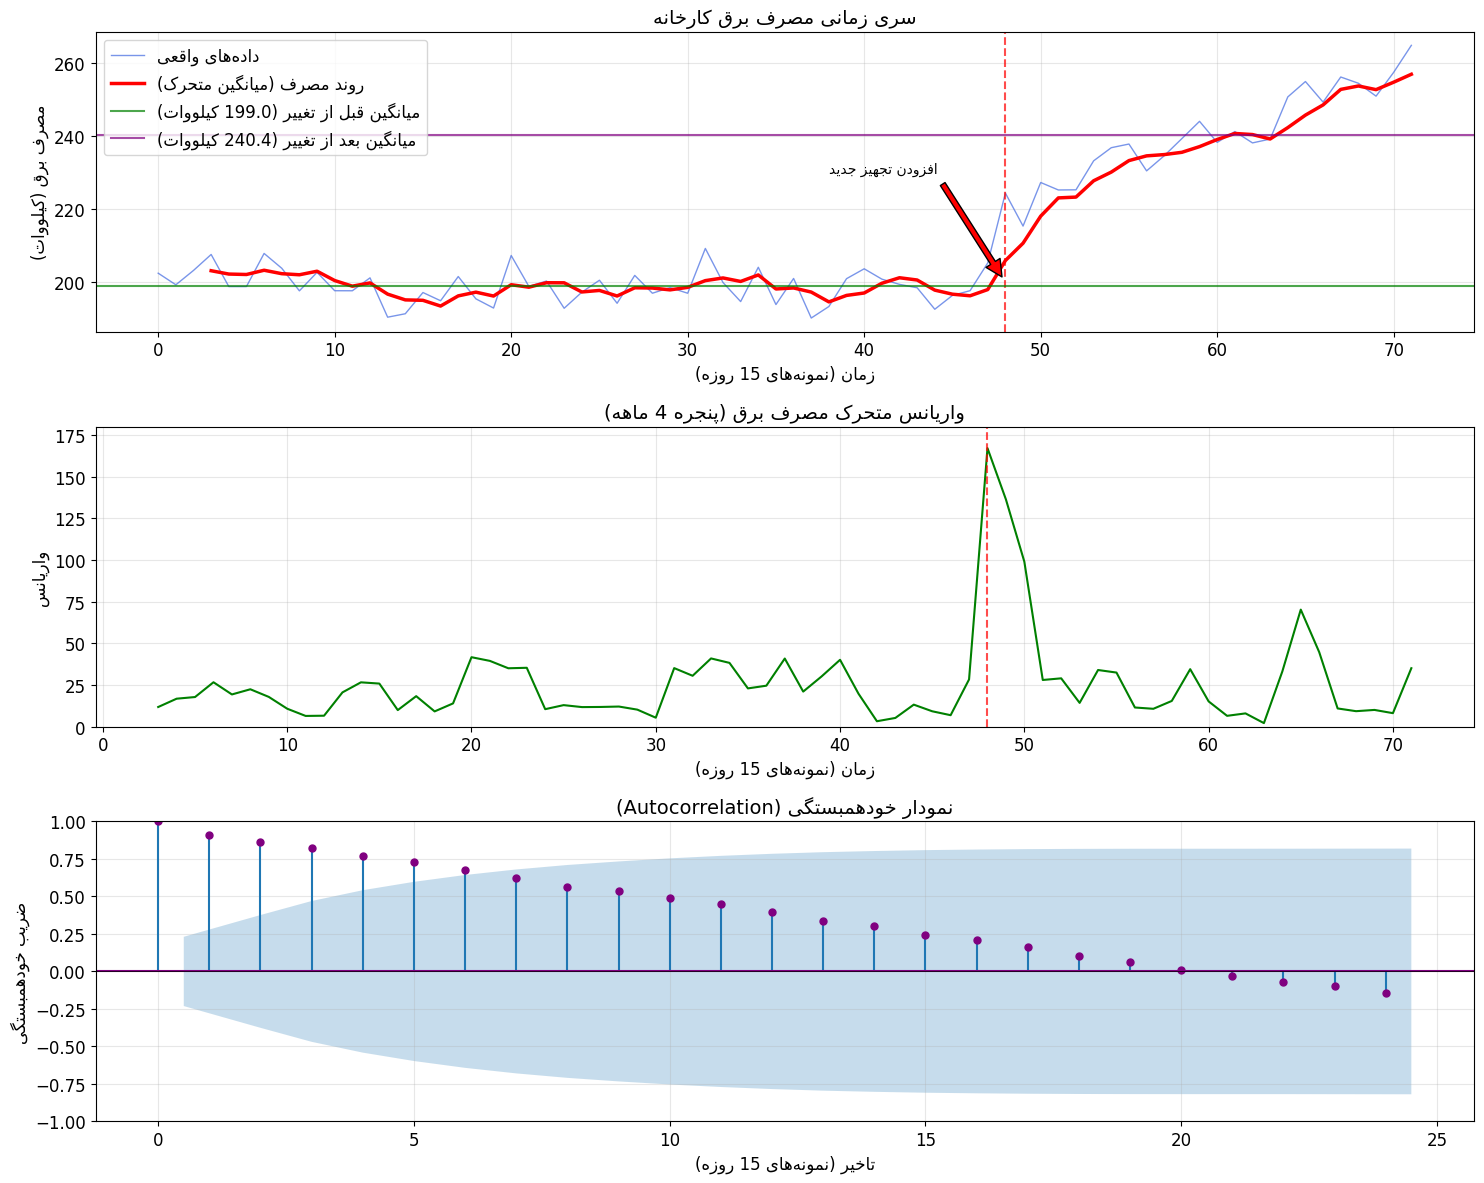

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import arabic_reshaper
from bidi.algorithm import get_display

# تابع برای نمایش صحیح متون فارسی
def bidi_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# تنظیمات اولیه
np.random.seed(42)
samples_per_year = 24  # نمونه‌های ماهانه (هر 15 روز)
total_samples = 3 * samples_per_year  # ۳ سال داده

# تولید داده‌های مصنوعی اصلاح شده
time = np.arange(total_samples)

# ۱. دو سال اول: میانگین ۲۰۰ کیلووات با نوسان کم
consumption = 200 + np.random.normal(0, 5, 2*samples_per_year)  # کاهش واریانس

# ۲. سال سوم: روند افزایشی واضح پس از افزودن تجهیز جدید
trend_start = 2 * samples_per_year
trend = 1.5 * (time[trend_start:] - trend_start)  # افزایش شیب روند
noise = np.random.normal(0, 5, samples_per_year)  # کاهش واریانس
new_consumption = 200 + trend + noise + np.random.uniform(15, 25)  # افزایش ناگهانی بیشتر

# ترکیب داده‌ها
consumption = np.concatenate([consumption, new_consumption])

# ایجاد دیتافریم
df = pd.DataFrame({
    'زمان': time,
    'مصرف_برق': consumption
})

# محاسبه میانگین‌ها
mean_before = np.mean(consumption[:trend_start])
mean_after = np.mean(consumption[trend_start:])
overall_mean = np.mean(consumption)

# محاسبه واریانس متحرک (با پنجره 4 ماهه)
df['واریانس_متحرک'] = df['مصرف_برق'].rolling(window=4).var()

# محاسبه میانگین متحرک برای خط روند
df['میانگین_متحرک'] = df['مصرف_برق'].rolling(window=4).mean()

# تنظیم فونت
plt.rcParams['font.family'] = 'B Nazanin'
plt.rcParams['font.size'] = 12

# ایجاد نمودارها
fig = plt.figure(figsize=(15, 12))

# نمودار ۱: سری زمانی مصرف برق
ax1 = plt.subplot(3, 1, 1)

# رسم داده‌ها و خط روند
ax1.plot(df['زمان'], df['مصرف_برق'], color='royalblue', linewidth=1,
         alpha=0.7, label=bidi_text('داده‌های واقعی'))
ax1.plot(df['زمان'], df['میانگین_متحرک'], color='red', linewidth=2.5,
         label=bidi_text('روند مصرف (میانگین متحرک)'))
ax1.axvline(x=trend_start, color='red', linestyle='--', alpha=0.7)

# خطوط میانگین
ax1.axhline(y=mean_before, color='green', linestyle='-', alpha=0.7,
           label=bidi_text(f'میانگین قبل از تغییر ({mean_before:.1f} کیلووات)'))
ax1.axhline(y=mean_after, color='purple', linestyle='-', alpha=0.7,
           label=bidi_text(f'میانگین بعد از تغییر ({mean_after:.1f} کیلووات)'))

ax1.set_title(bidi_text('سری زمانی مصرف برق کارخانه'), fontsize=14)
ax1.set_xlabel(bidi_text('زمان (نمونه‌های 15 روزه)'), fontsize=12)
ax1.set_ylabel(bidi_text('مصرف برق (کیلووات)'), fontsize=12)
ax1.grid(alpha=0.3)
ax1.annotate(bidi_text('افزودن تجهیز جدید'),
             xy=(trend_start, 200),
             xytext=(trend_start-10, 230),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10)
ax1.legend(loc='upper left')

# نمودار ۲: واریانس متحرک
ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['زمان'], df['واریانس_متحرک'], color='green', linewidth=1.5)
ax2.axvline(x=trend_start, color='red', linestyle='--', alpha=0.7)
ax2.set_title(bidi_text('واریانس متحرک مصرف برق (پنجره 4 ماهه)'), fontsize=14)
ax2.set_xlabel(bidi_text('زمان (نمونه‌های 15 روزه)'), fontsize=12)
ax2.set_ylabel(bidi_text('واریانس'), fontsize=12)
ax2.grid(alpha=0.3)
ax2.set_ylim(0, 180)  # کاهش محدوده محور Y

# نمودار ۳: خودهمبستگی
ax3 = plt.subplot(3, 1, 3)
plot_acf(df['مصرف_برق'], lags=24, ax=ax3, color='purple')
ax3.set_title(bidi_text('نمودار خودهمبستگی (Autocorrelation)'), fontsize=14)
ax3.set_xlabel(bidi_text('تاخیر (نمونه‌های 15 روزه)'), fontsize=12)
ax3.set_ylabel(bidi_text('ضریب خودهمبستگی'), fontsize=12)
ax3.grid(alpha=0.3)
ax3.axhline(y=0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

In [ ]:
!pip install arabic_reshaper python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 6.7 MB/s eta 0:00:00


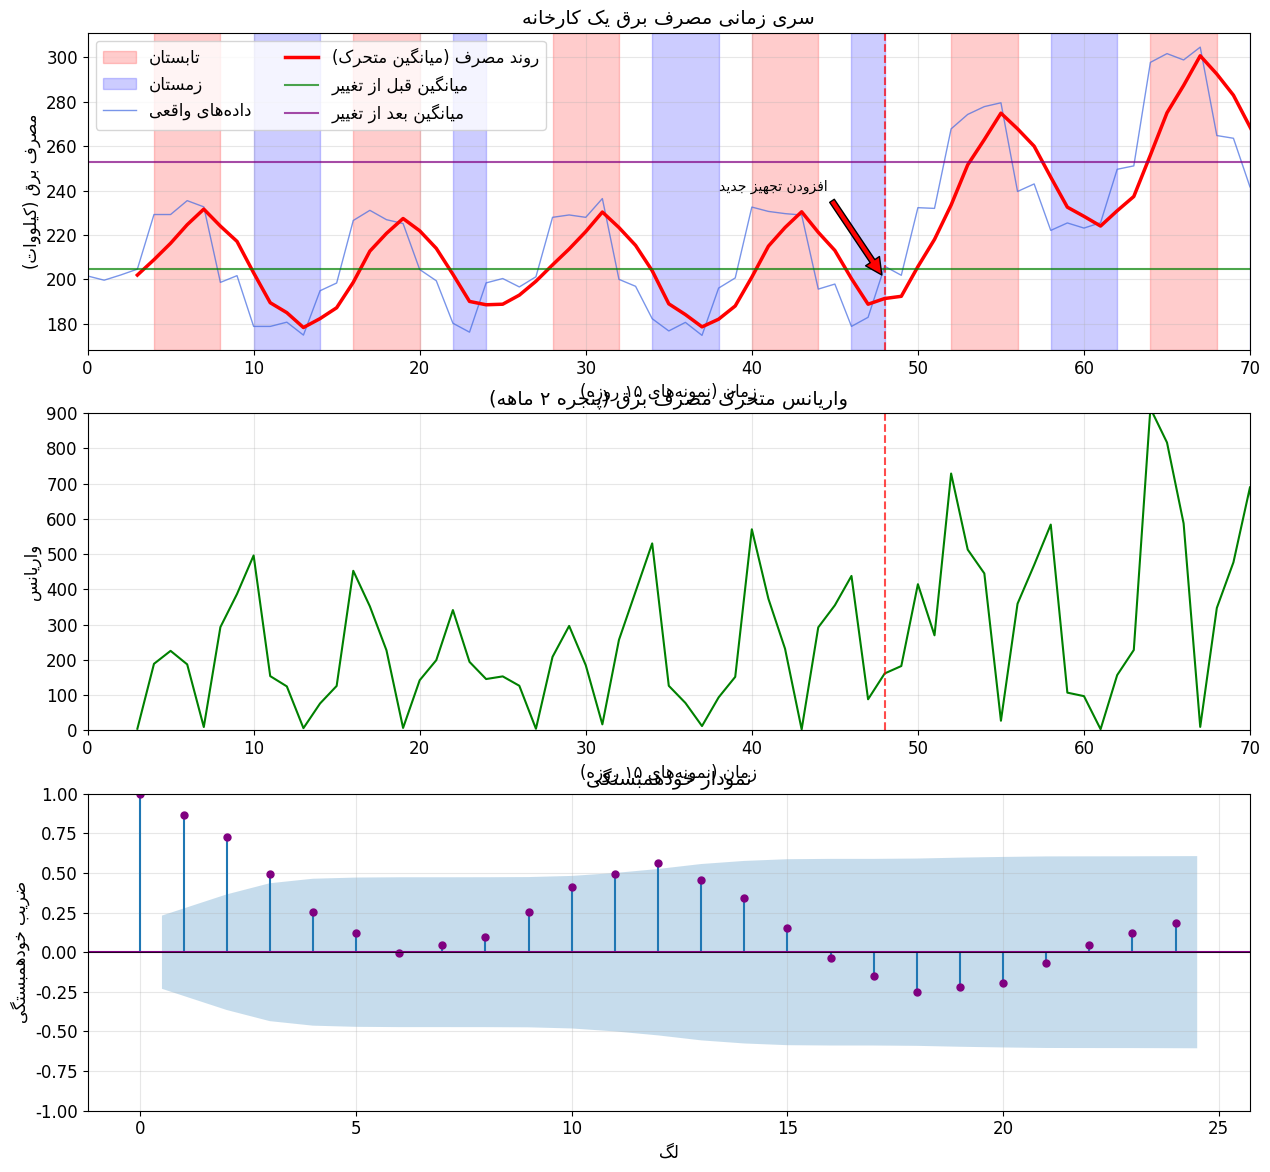

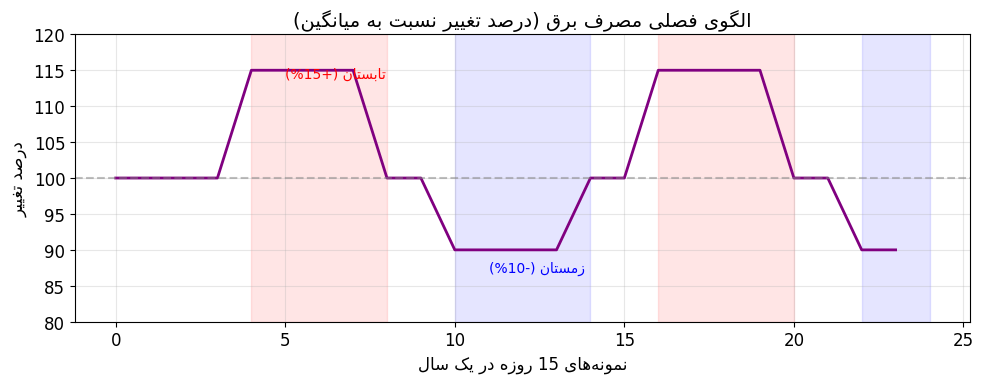

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib as mpl

# تابع برای نمایش صحیح متون فارسی
def bidi_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# تنظیمات اولیه
np.random.seed(42)
samples_per_year = 24  # نمونه‌های ماهانه (هر 15 روز)
total_samples = 3 * samples_per_year  # ۳ سال داده

# تولید داده‌های مصنوعی با الگوی فصلی
time = np.arange(total_samples)

# ایجاد الگوی فصلی
seasonal_pattern = np.ones(total_samples)
for year in range(3):
    # تابستان (نمونه‌های 4-8 و 16-20): افزایش 15%
    summer1 = slice(year * samples_per_year + 4, year * samples_per_year + 8)
    summer2 = slice(year * samples_per_year + 16, year * samples_per_year + 20)
    seasonal_pattern[summer1] = 1.15
    seasonal_pattern[summer2] = 1.15

    # زمستان (نمونه‌های 10-14 و 22-2): کاهش 10%
    winter1 = slice(year * samples_per_year + 10, year * samples_per_year + 14)
    winter2 = slice(year * samples_per_year + 22, year * samples_per_year + min(26, (year+1)*samples_per_year))
    seasonal_pattern[winter1] = 0.90
    seasonal_pattern[winter2] = 0.90

# ۱. دو سال اول: میانگین ۲۰۰ کیلووات با نوسان کم
base_consumption = 200 + np.random.normal(0, 3, 2*samples_per_year)  # کاهش بیشتر واریانس

# ۲. سال سوم: روند افزایشی واضح
trend_start = 2 * samples_per_year
trend = 1.8 * (time[trend_start:] - trend_start)  # افزایش بیشتر شیب روند
noise = np.random.normal(0, 3, samples_per_year)
base_third = 200 + trend + noise + np.random.uniform(20, 30)  # افزایش ناگهانی بیشتر

# ترکیب داده‌های پایه
base = np.concatenate([base_consumption, base_third])

# اعمال الگوی فصلی
consumption = base * seasonal_pattern

# ایجاد دیتافریم
df = pd.DataFrame({
    'زمان': time,
    'مصرف_برق': consumption,
    'الگوی_فصلی': seasonal_pattern
})

# محاسبه میانگین‌ها
mean_before = np.mean(consumption[:trend_start])
mean_after = np.mean(consumption[trend_start:])

# محاسبه واریانس متحرک (با پنجره 4 ماهه)
df['واریانس_متحرک'] = df['مصرف_برق'].rolling(window=4).var()

# محاسبه میانگین متحرک برای خط روند
df['میانگین_متحرک'] = df['مصرف_برق'].rolling(window=4).mean()

# تنظیم فونت
plt.rcParams['font.family'] = 'B Nazanin'
plt.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = False  # حل مشکل نمایش علامت منفی

# ایجاد نمودارها
fig = plt.figure(figsize=(15, 14))

# نمودار ۱: سری زمانی مصرف برق
ax1 = plt.subplot(3, 1, 1)

# مشخص کردن مناطق فصلی
for year in range(3):
    # تابستان
    ax1.axvspan(year * samples_per_year + 4, year * samples_per_year + 8,
                alpha=0.2, color='red', label=bidi_text('تابستان') if year == 0 else "")
    ax1.axvspan(year * samples_per_year + 16, year * samples_per_year + 20,
                alpha=0.2, color='red')

    # زمستان
    ax1.axvspan(year * samples_per_year + 10, year * samples_per_year + 14,
                alpha=0.2, color='blue', label=bidi_text('زمستان') if year == 0 else "")
    ax1.axvspan(year * samples_per_year + 22, min((year+1)*samples_per_year, year * samples_per_year + 26),
                alpha=0.2, color='blue')

# رسم داده‌ها و خط روند
ax1.plot(df['زمان'], df['مصرف_برق'], color='royalblue', linewidth=1,
         alpha=0.7, label=bidi_text('داده‌های واقعی'))
ax1.plot(df['زمان'], df['میانگین_متحرک'], color='red', linewidth=2.5,
         label=bidi_text('روند مصرف (میانگین متحرک)'))
ax1.axvline(x=trend_start, color='red', linestyle='--', alpha=0.7)

# خطوط میانگین
ax1.axhline(y=mean_before, color='green', linestyle='-', alpha=0.7,
           label=bidi_text(f'میانگین قبل از تغییر'))
ax1.axhline(y=mean_after, color='purple', linestyle='-', alpha=0.7,
           label=bidi_text(f'میانگین بعد از تغییر'))

ax1.set_title(bidi_text('سری زمانی مصرف برق یک کارخانه'), fontsize=14)
ax1.set_xlabel(bidi_text('زمان (نمونه‌های ۱۵ روزه)'), fontsize=12)
ax1.set_ylabel(bidi_text('مصرف برق (کیلووات)'), fontsize=12)
ax1.set_xlim(0, 70)
ax1.grid(alpha=0.3)
ax1.annotate(bidi_text('افزودن تجهیز جدید'),
             xy=(trend_start, 200),
             xytext=(trend_start-10, 240),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10)
ax1.legend(loc='upper left', ncol=2)

# نمودار ۲: واریانس متحرک
ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['زمان'], df['واریانس_متحرک'], color='green', linewidth=1.5)
ax2.axvline(x=trend_start, color='red', linestyle='--', alpha=0.7)
ax2.set_title(bidi_text('واریانس متحرک مصرف برق (پنجره ۲ ماهه)'), fontsize=14)
ax2.set_xlabel(bidi_text('زمان (نمونه‌های ۱۵ روزه)'), fontsize=12)
ax2.set_ylabel(bidi_text('واریانس'), fontsize=12)
ax2.grid(alpha=0.3)
ax2.set_ylim(0, 900)  # کاهش محدوده محور Y
ax2.set_xlim(0, 70)
# نمودار ۳: خودهمبستگی
ax3 = plt.subplot(3, 1, 3)
plot_acf(df['مصرف_برق'], lags=24, ax=ax3, color='purple')
ax3.set_title(bidi_text('نمودار خودهمبستگی'), fontsize=14)
ax3.set_xlabel(bidi_text('لگ'), fontsize=12)
ax3.set_ylabel(bidi_text('ضریب خودهمبستگی'), fontsize=12)
ax3.grid(alpha=0.3)
ax3.axhline(y=0, color='black', linewidth=0.5)

# افزودن نمودار الگوی فصلی برای شفافیت بیشتر
plt.figure(figsize=(10, 4))
plt.plot(df['زمان'][:samples_per_year], df['الگوی_فصلی'][:samples_per_year]*100,
         color='purple', linewidth=2)
plt.title(bidi_text('الگوی فصلی مصرف برق (درصد تغییر نسبت به میانگین)'), fontsize=14)
plt.xlabel(bidi_text('نمونه‌های 15 روزه در یک سال'), fontsize=12)
plt.ylabel(bidi_text('درصد تغییر'), fontsize=12)
plt.grid(alpha=0.3)
plt.axhline(y=100, color='gray', linestyle='--', alpha=0.5)
plt.annotate(bidi_text('تابستان (+15%)'), xy=(5, 114), fontsize=10, color='red')
plt.annotate(bidi_text('زمستان (-10%)'), xy=(11, 87), fontsize=10, color='blue')
plt.fill_between([4,8], 80, 120, color='red', alpha=0.1)
plt.fill_between([16,20], 80, 120, color='red', alpha=0.1)
plt.fill_between([10,14], 80, 120, color='blue', alpha=0.1)
plt.fill_between([22,24], 80, 120, color='blue', alpha=0.1)
plt.ylim(80, 120)
plt.tight_layout()

plt.tight_layout()
plt.show()